In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm

os.getcwd()
os.chdir('/Users/andre/downloads')

In [3]:
Sector = pd.read_excel('table_industry.xlsx')
Job = pd.read_excel('table_application.xlsx')

In [556]:
Sector

,Year,industrycode,industry,countrycode,country,delivered,op_stock
0,1993,0,All Industries,DE,Germany,4325,41415
1,1993,90,All other non-manufacturing branches,DE,Germany,0,0
2,1993,2939,Other (AutoParts),DE,Germany,0,0
3,1993,2934,Glass (AutoParts),DE,Germany,0,0
4,1993,2933,Electrical/electronic (AutoParts),DE,Germany,0,0
...,...,...,...,...,...,...,...
112495,2017,13-15,Textiles,SAM,South America,1,2
112496,2017,10-12,Food and beverages,SAM,South America,116,638
112497,2017,D,Manufacturing,SAM,South America,1110,13038
112498,2017,C,Mining and quarrying,SAM,South America,1,38


In [107]:
US_Output_Manufacturing = pd.read_excel('OUTMS.xls')
#https://fred.stlouisfed.org/series/OUTMS

US_Manu_Employee = pd.read_excel('MANEMP.xls')
# https://fred.stlouisfed.org/series/MANEMP

US_Manufacturing_Productivity = pd.read_csv('MFGOPH.csv')
#https://fred.stlouisfed.org/series/MFGOPH

Wages = pd.read_excel('CES3000000008.xls')
#https://fred.stlouisfed.org/series/CES3000000008

Avg_Income = pd.read_excel('MAPAINUSA646N.xls')
#https://fred.stlouisfed.org/series/MAPAINUSA646N

Automotive_Companies = pd.read_excel('AUTOMOTIVE_DATA.xlsx')

#Average Prices of semiconductors in the US
SemiConductor_Price_Index = pd.read_excel('PCU33443344.xls')
#https://fred.stlouisfed.org/series/PCU33443344

# manufacturing Layoffs
Manu_layoff = pd.read_excel('JTU3000LDL.xls')
#https://fred.stlouisfed.org/series/JTU3000LDL

#manufacturing hours worked
Manu_hours = pd.read_excel('AWHMAN.xls')
# https://fred.stlouisfed.org/series/AWHAEMAN

#manufacturing job openings
Manu_openings = pd.read_excel('JTS3000JOL.xls')
#https://fred.stlouisfed.org/series/JTS3000JOL

Manu_PCI = pd.read_excel('PCUOMFGOMFG.xls')
#https://fred.stlouisfed.org/series/PCUOMFGOMFG

ASM = pd.read_excel('ASM Robotics.xlsx')
# https://fred.stlouisfed.org/series/AWHAEMAN


In [5]:
topTenCountries = Sector[Sector['country'] != 'WORLD']
topTenCountries = topTenCountries[topTenCountries['Year'] == 2017]
topTenCountries = topTenCountries[topTenCountries['industry'] == 'All Industries']

topTenCountries = topTenCountries.sort_values(by='op_stock', ascending=False)

# to make life easier we are only looking at the ten largest supplies of robots
newSector = Sector[Sector['country'].isin(topTenCountries['country'].unique())]
newJobs = Job[Job['country'].isin(topTenCountries['country'].unique())]

In [6]:
automotive = ["Other(AutoParts)", "Glass (AutoParts)",  "Electrical/electronic (AutoParts)", "Rubber and Plastic (AutoParts)", "Metal (AutoParts)", "Automotive Parts", "Automotive unspecified", "Other vehicles", "Unspecified AutoParts", "Motor vehicles", "engines and bodies", "Automotive"]

auto = newSector[newSector["industry"].isin(automotive)]


In [610]:
Sector[Sector['country'] == 'world']
Sector

,Year,industrycode,industry,countrycode,country,delivered,op_stock
0,1993,0,All Industries,DE,Germany,4325,41415
1,1993,90,All other non-manufacturing branches,DE,Germany,0,0
2,1993,2939,Other (AutoParts),DE,Germany,0,0
3,1993,2934,Glass (AutoParts),DE,Germany,0,0
4,1993,2933,Electrical/electronic (AutoParts),DE,Germany,0,0
...,...,...,...,...,...,...,...
112495,2017,13-15,Textiles,SAM,South America,1,2
112496,2017,10-12,Food and beverages,SAM,South America,116,638
112497,2017,D,Manufacturing,SAM,South America,1110,13038
112498,2017,C,Mining and quarrying,SAM,South America,1,38


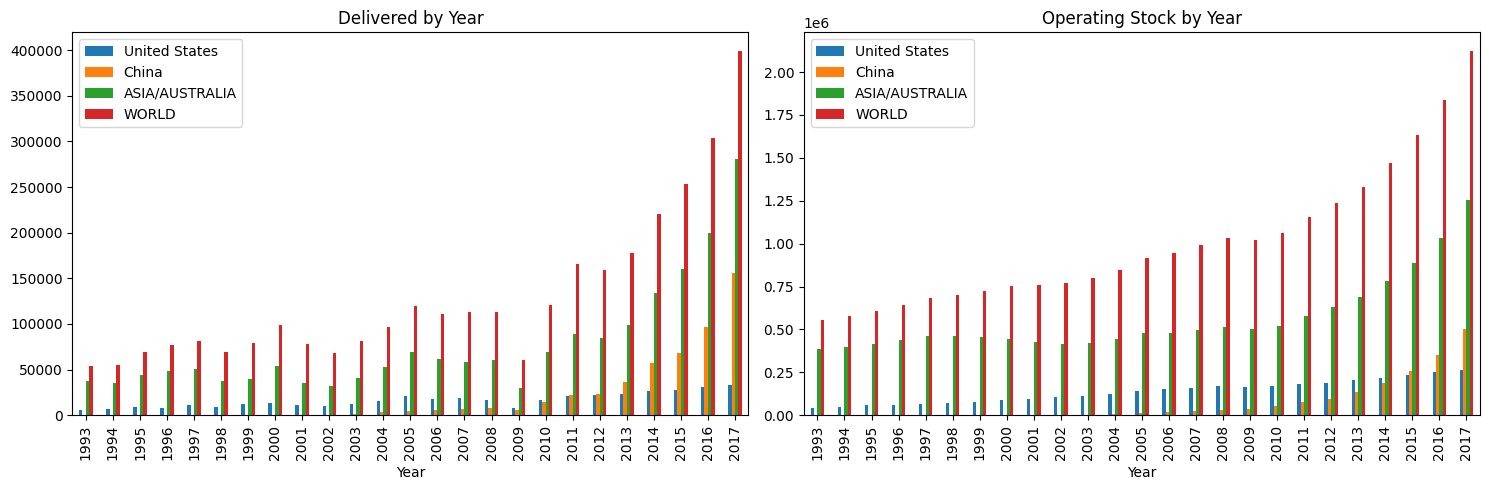

In [727]:

 
%run C:\Users\andre\PyCharmProjects\pythonProject\features\Country.ipynb

#plotting the entire dataset
#plotting(newSector)

#plotting a specific country
#specificCountry(newJobs, 'United States')

#compare industries

#compare(newSector, 'United States', 'China', 'delivered')

#compare(auto, 'United States', 'China', 'delivered')

#plotting the sectors in comparison 
#sectors(newJobs,'delivered', 'United States', 'China')
countries(Sector, 'United States', 'China',  'ASIA/AUSTRALIA','WORLD')

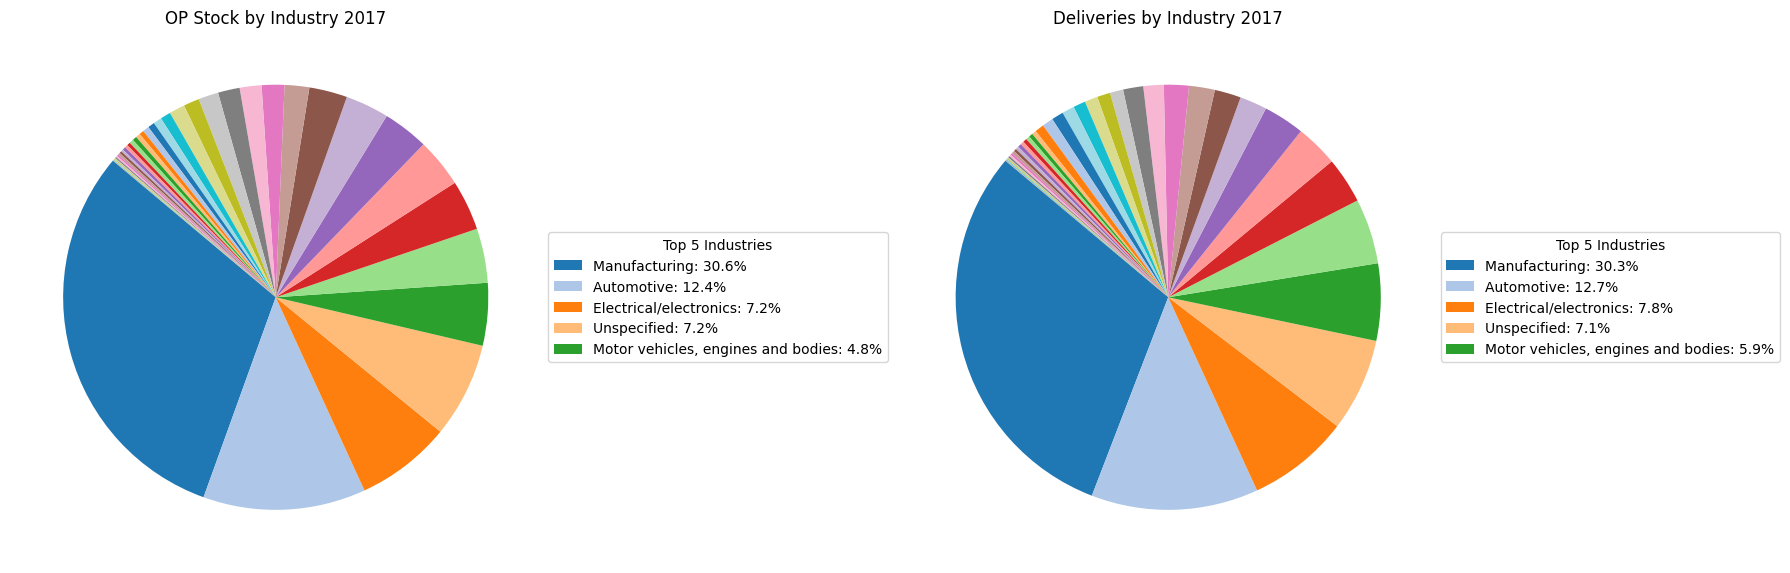

In [562]:
# Assuming df is your DataFrame

# Step 1: Filter the DataFrame for the most recent year




# Step 1: Filter the DataFrame for the most recent year
most_recent_year = Sector['Year'].max()
df_recent = Sector[Sector['Year'] == most_recent_year]
df_recent = Sector[Sector['industry'] != 'All Industries']
# Step 2: Aggregate the data by industry

# Step 2: Aggregate the data by industry
df_aggregated = df_recent.groupby('industry').agg({'op_stock': 'sum', 'delivered': 'sum'})

# Function to plot pie chart with legend for top 5 industries including their percentages
def plot_pie_with_legend(df_column, title, ax):
    # Sort the column to get top 5 industries
    sorted_df = df_column.sort_values(ascending=False)
    total = sorted_df.sum()
    # Plot pie chart
    wedges, texts, autotexts = ax.pie(sorted_df, startangle=140, autopct="", colors=plt.cm.tab20.colors)
    ax.set_title(title)
    
    # Create labels for the legend with percentages
    top_5_labels = sorted_df[:5].index
    top_5_percentages = [(value / total * 100) for value in sorted_df[:5]]
    legend_labels = [f'{label}: {percentage:.1f}%' for label, percentage in zip(top_5_labels, top_5_percentages)]
    
    # Get wedges for the top 5 industries
    legend_wedges = [wedges[i] for i in range(5)]
    
    # Create legend
    ax.legend(legend_wedges, legend_labels, title="Top 5 Industries", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Create figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))

# Plot OP Stock and Deliveries pie charts
plot_pie_with_legend(df_aggregated['op_stock'], 'OP Stock by Industry 2017', axes[0])
plot_pie_with_legend(df_aggregated['delivered'], 'Deliveries by Industry 2017', axes[1])

plt.tight_layout()
plt.show()


In [7]:
%run C:\Users\andre\PyCharmProjects\pythonProject\features\functions.ipynb

US_Output_Manufacturing = clean_fred(US_Output_Manufacturing, unit = "units")
US_Manufacturing_Employees = clean_fred(US_Manu_Employee, unit = "units")
US_Manufacturing_Productivity = clean_fred(US_Manufacturing_Productivity, unit = "units")
US_WAGES = clean_fred(Wages, unit = "Dollars/hour")
US_INCOME = clean_fred(Avg_Income, unit = "Dollars")
US_LAYOFFS =clean_fred(Manu_layoff, unit = "units")
US_SEMI = clean_fred(SemiConductor_Price_Index, unit = "Dollars")
US_HOURS = clean_fred(Manu_hours, unit = "units")
US_OPENINGS = clean_fred(Manu_openings, unit = "Dollars")
US_PCI = clean_fred(Manu_PCI, unit = "units")

In [8]:
%run C:\Users\andre\PyCharmProjects\pythonProject\features\functions.ipynb

Wages_norm = normalize(US_WAGES)
Employee_norm = normalize(US_Manufacturing_Employees)
Productivity_norm =  normalize(US_Manufacturing_Productivity)
Income_norm = normalize(US_INCOME)
Wages_norm = normalize(US_WAGES)
Layoffs_norm = normalize(US_LAYOFFS)
Semi_norm = normalize(US_SEMI)
Hours_norm = normalize(US_HOURS)
Openings_norm = normalize(US_OPENINGS)
PCI_norm = normalize(US_PCI)

AMERICA_ROBOTS = Sector[Sector['country'] == "United States"].copy()

America_Manu = AMERICA_ROBOTS[AMERICA_ROBOTS['industry'] == "Manufacturing"].copy()


In [9]:
employee = America_Manu[America_Manu['Year'] >= 2004].copy()
employee['workers'] = US_Manufacturing_Employees['units'].values
#robots per 1000 workers
employee['robots/worker'] = employee['op_stock']/ (employee['workers'])
employee = employee.reset_index(drop=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_12240\1512627095.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(employee['Year'], p(employee['Year']), "r--", label='Trend Line', color = 'grey')


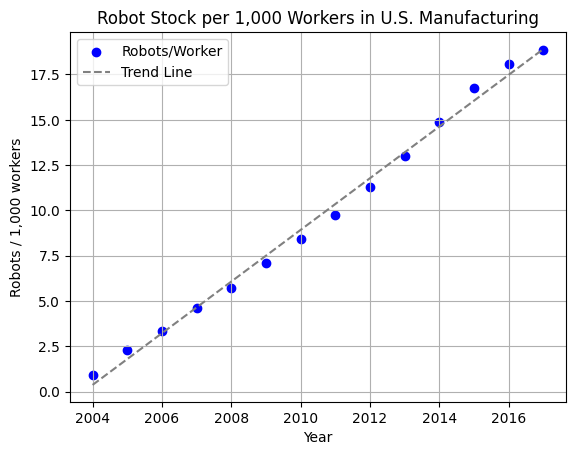

1.425642110866803


In [10]:
# Scatter plot
# Convert 'Year' and 'robots/worker' to numeric, coercing errors to NaN
employee['Year'] = pd.to_numeric(employee['Year'], errors='coerce')
employee['robots/worker'] = pd.to_numeric(employee['robots/worker'], errors='coerce')

# Optionally, remove rows with NaN values if any
employee.dropna(subset=['Year', 'robots/worker'], inplace=True)

# Now, plotting the scatter plot and fitting the trend line should work
plt.scatter(employee['Year'], employee['robots/worker'], color='blue', label='Robots/Worker')

# Calculating the trend line
z = np.polyfit(employee['Year'], employee['robots/worker'], 1)
p = np.poly1d(z)
plt.plot(employee['Year'], p(employee['Year']), "r--", label='Trend Line', color = 'grey')

# Labeling the plot
plt.title('Robot Stock per 1,000 Workers in U.S. Manufacturing')
plt.xlabel('Year')
plt.ylabel('Robots / 1,000 workers')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

print(z[0])

In [11]:
%run C:\Users\andre\PyCharmProjects\pythonProject\features\functions.ipynb
#normalizing the robots/workers
robots_per_workers_norm = normalize(employee[['Year', 'robots/worker']].copy())
robots_normalized = normalize(employee[['Year', 'op_stock']]).copy()
robots_normalized = robots_normalized.reset_index(drop=True)
robots_normalized

,date,op_stock
0,2004,1.000000
1,2005,2.495576
2,2006,3.641190
3,2007,4.886117
4,2008,5.870938
5,2009,6.413425
6,2010,7.385660
7,2011,8.731960
8,2012,10.285584
9,2013,11.899161


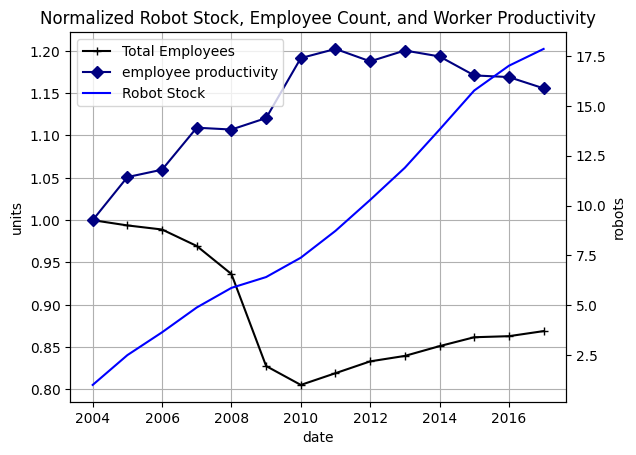

In [12]:


# Create the initial plot and assign it to a variable
fig, ax1 = plt.subplots()

# Plotting Employee count and productivity on the primary y-axis (left side)
color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('units')#, color=color)
ax1.plot(Employee_norm['date'], Employee_norm['units'], marker='+', label='Total Employees', color='black')
ax1.plot(Productivity_norm['date'], Productivity_norm['units'], marker='D', label='employee productivity', color='navy')
ax1.tick_params(axis='y')#, labelcolor=color)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plotting Robot stock on the secondary y-axis (right side)
color = 'tab:blue'
ax2.set_ylabel('robots')#, color=color)  # we already handled the x-label with ax1
ax2.plot(robots_normalized['date'], robots_normalized['op_stock'], linestyle='-', label='Robot Stock', color='blue')
ax2.tick_params(axis='y')#, labelcolor=color)

# Adding a title and grid
plt.title('Normalized Robot Stock, Employee Count, and Worker Productivity')
ax1.grid()

# Handling the legend
# Since we are using two different axes, we need to manually handle the legend for both
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
plt.legend(lines, labels, loc='upper left')

plt.show()


In [13]:
%run C:\Users\andre\PyCharmProjects\pythonProject\features\functions.ipynb
wagepct = pct_chg(Wages_norm)
robpct = pct_chg(robots_normalized)
emplpct = pct_chg(Employee_norm)
prodpct = pct_chg(Productivity_norm)
incpct = pct_chg(Income_norm)
wagespct = pct_chg(Wages_norm)
layoffspct = pct_chg(Layoffs_norm)
semipct = pct_chg(Semi_norm)
hourspct = pct_chg(Hours_norm)
openingspct = pct_chg(Openings_norm)
PCI_pct = pct_chg(PCI_norm)





In [14]:
pct_table = pd.DataFrame({'Date': robots_normalized['date'], 'Wages': wagepct['Pct_Chg'], 'Robots': robpct['Pct_Chg'],
                         'Employees': emplpct['Pct_Chg'], 'Productivity': prodpct['Pct_Chg'], 
                         'Income': incpct['Pct_Chg'], 'Wages': wagespct['Pct_Chg'], 'Layoffs': layoffspct['Pct_Chg'],
                          'Semiconductors': semipct['Pct_Chg'], 'Hours': hourspct['Pct_Chg'], 'Openings': openingspct['Pct_Chg'],
                          'PCI': PCI_pct['Pct_Chg']})

pct_table.dropna(subset='Hours', inplace = True)
pct_table = pct_table.reset_index(drop=True)


Using Productivity as the Dependant

In [15]:
data = {
    'Productivity': pct_table['Productivity'],  # Productivity change values
    'Robots': pct_table['Robots'],       # Robots change values
    'Employees': pct_table['Employees'],     # Employees change values
    'openings': pct_table['Openings'],
    'Wages': pct_table['Wages'],
    'layoffs': pct_table['Layoffs']
}

df = pd.DataFrame(data)

# Defining the dependent and independent variables
X = df[['Robots']]  # Independent variables
y = df['Productivity']           # Dependent variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the regression model
model = sm.OLS(y, X).fit()

# Viewing the summary of the regression
print(model.summary())


################################################################################################################################################

# Defining the dependent and independent variables
X = df[['Robots', 'Employees']]  # Independent variables
y = df['Productivity']           # Dependent variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the regression model
model = sm.OLS(y, X).fit()

# Viewing the summary of the regression
print(model.summary())

################################################################################################################################################

# Defining the dependent and independent variables
X = df[['Robots', 'Employees', 'layoffs']]  # Independent variables
y = df['Productivity']           # Dependent variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the regression model
model = sm.OLS(y, X).fit()

# Viewing the summary of the regression
print(model.summary())

######################################################################################################################################################

# Defining the dependent and independent variables
X = df[['Robots', 'Employees', 'layoffs', 'openings']]  # Independent variables
y = df['Productivity']           # Dependent variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the regression model
model = sm.OLS(y, X).fit()

# Viewing the summary of the regression
print(model.summary())

################################################################################################################################################

# Defining the dependent and independent variables
X = df[['Robots', 'Employees', 'layoffs', 'openings', 'Wages']]  # Independent variables
y = df['Productivity']           # Dependent variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the regression model
model = sm.OLS(y, X).fit()

# Viewing the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Productivity   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     3.878
Date:                Tue, 09 Apr 2024   Prob (F-statistic):             0.0746
Time:                        15:24:39   Log-Likelihood:                 31.457
No. Observations:                  13   AIC:                            -58.91
Df Residuals:                      11   BIC:                            -57.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.008      0.190      0.8

C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
 

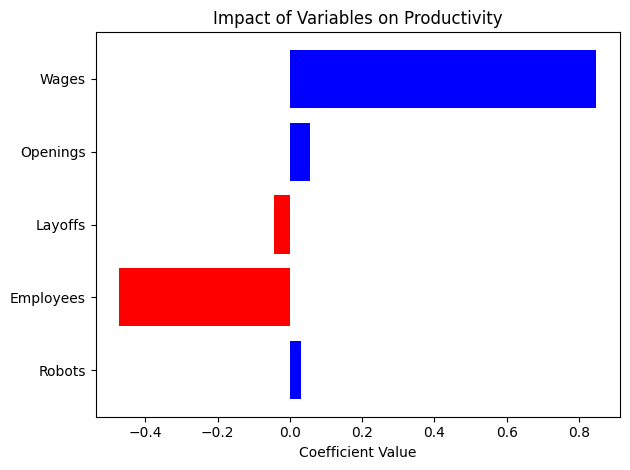

In [16]:
coefficients = {'Robots': 0.0295, 'Employees': -0.4717, 'Layoffs': -0.0453, 'Openings': 0.0560, 'Wages': 0.8475}
variables = list(coefficients.keys())
values = list(coefficients.values())

# Creating the plot
fig, ax = plt.subplots()
ax.barh(variables, values, color=['blue' if v > 0 else 'red' for v in values])
ax.set_xlabel('Coefficient Value')
ax.set_title('Impact of Variables on Productivity')

plt.tight_layout()
plt.show()

Using PCI as dependant

In [17]:
data = {
    'Productivity': pct_table['PCI'],  # Productivity change values
    'Robots': pct_table['Robots'],       # Robots change values
    'Employees': pct_table['Employees'],     # Employees change values
    'openings': pct_table['Openings'],
    'Wages': pct_table['Wages'],
    'layoffs': pct_table['Layoffs']
}

df = pd.DataFrame(data)

# Defining the dependent and independent variables
X = df[['Robots']]  # Independent variables
y = df['Productivity']           # Dependent variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the regression model
model = sm.OLS(y, X).fit()

# Viewing the summary of the regression
print(model.summary())

##############################################################################################################################

# Defining the dependent and independent variables
X = df[['Robots', 'Employees']]  # Independent variables
y = df['Productivity']           # Dependent variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the regression model
model = sm.OLS(y, X).fit()

# Viewing the summary of the regression
print(model.summary())

##############################################################################################################################

# Defining the dependent and independent variables
X = df[['Robots', 'Employees', 'layoffs']]  # Independent variables
y = df['Productivity']           # Dependent variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the regression model
model = sm.OLS(y, X).fit()

# Viewing the summary of the regression
print(model.summary())

##############################################################################################################################

# Defining the dependent and independent variables
X = df[['Robots', 'Employees', 'layoffs', 'openings']]  # Independent variables
y = df['Productivity']           # Dependent variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the regression model
model = sm.OLS(y, X).fit()

# Viewing the summary of the regression
print(model.summary())

##############################################################################################################################


# Defining the dependent and independent variables
X = df[['Robots', 'Employees', 'layoffs', 'openings', 'Wages']]  # Independent variables
y = df['Productivity']           # Dependent variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the regression model
model = sm.OLS(y, X).fit()

# Viewing the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Productivity   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.344
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.271
Time:                        15:24:41   Log-Likelihood:                 23.893
No. Observations:                  13   AIC:                            -43.79
Df Residuals:                      11   BIC:                            -42.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0118      0.015      0.800      0.4

C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
 

In [18]:
robots_per_workers_norm
employee

,Year,industrycode,industry,countrycode,country,delivered,op_stock,workers,robots/worker
0,2004,D,Manufacturing,US,United States,13110,13110,14314.75,0.915839
1,2005,D,Manufacturing,US,United States,19607,32717,14225.666667,2.299857
2,2006,D,Manufacturing,US,United States,15019,47736,14156.5,3.372020
3,2007,D,Manufacturing,US,United States,16321,64057,13877.833333,4.615778
4,2008,D,Manufacturing,US,United States,12911,76968,13403.416667,5.742416
5,2009,D,Manufacturing,US,United States,7112,84080,11847.833333,7.096656
6,2010,D,Manufacturing,US,United States,12746,96826,11528.666667,8.398716
7,2011,D,Manufacturing,US,United States,17650,114476,11727.083333,9.761677
8,2012,D,Manufacturing,US,United States,20368,134844,11927.0,11.305777
9,2013,D,Manufacturing,US,United States,21154,155998,12019.166667,12.979103


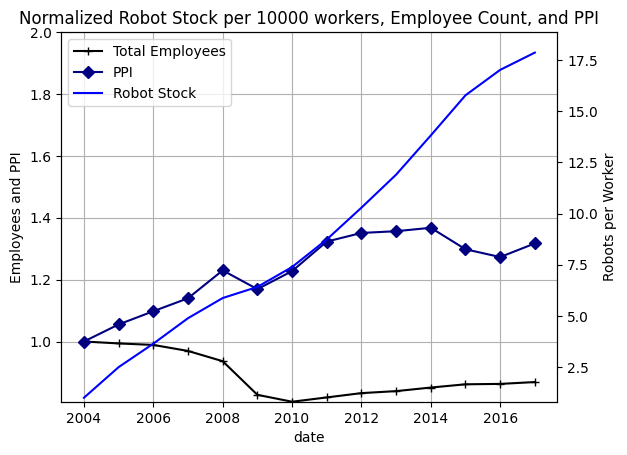

In [19]:


# Initial plot setup
fig, ax1 = plt.subplots()

# Primary Y-axis (for Employee count and productivity)
color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('Employees and PPI')
ax1.plot(Employee_norm['date'], Employee_norm['units'], marker='+', label='Total Employees', color='black')
ax1.plot(Productivity_norm['date'], PCI_norm['units'], marker='D', label='PPI', color='navy')
ax1.tick_params(axis='y')

# Manually set the y-axis limit for ax1 if needed to include negative values
# ax1.set_ylim([min_value_for_ax1, max_value_for_ax1])

# Secondary Y-axis (for Robot stock)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Robots per Worker')
ax2.plot(robots_per_workers_norm['date'], robots_normalized['op_stock'], linestyle='-', label='Robot Stock', color='blue')
ax2.tick_params(axis='y')

# Since your datasets have different scales, you need to set limits for ax2 independently
# ax2.set_ylim([min_value_for_ax2, max_value_for_ax2])

# Ensure both y-axes start at the same point, such as 1, and adjust for negative values if necessary
shared_start_point = 1  # Example start point, adjust based on your data's normalization
min_ax1 = Employee_norm['units'].min()
min_ax2 = robots_normalized['op_stock'].min()
max_ax1 = Employee_norm['units'].max()
max_ax2 = robots_normalized['op_stock'].max()

# Setting the start point for both axes, adjust min and max values as needed
ax1.set_ylim(bottom=min(min_ax1, shared_start_point), top=max(max_ax1, shared_start_point + max_ax1))
ax2.set_ylim(bottom=min(min_ax1, shared_start_point), top=max(max_ax2, shared_start_point + max_ax2))

# Adding title, grid, and legend
plt.title('Normalized Robot Stock per 10000 workers, Employee Count, and PPI')
ax1.grid(True)

# Handling legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

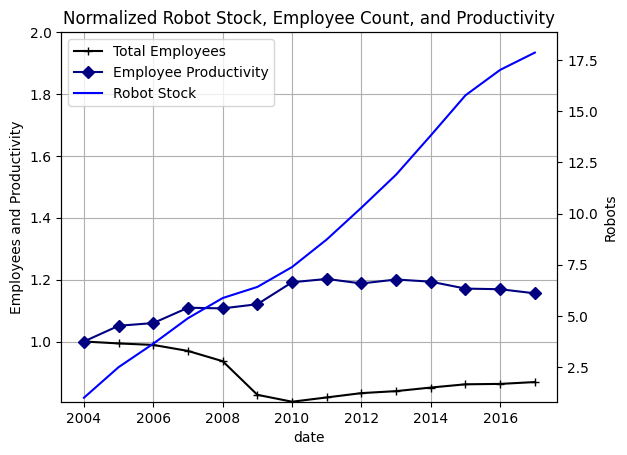

In [20]:


# Initial plot setup
fig, ax1 = plt.subplots()

# Primary Y-axis (for Employee count and productivity)
color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('Employees and Productivity')
ax1.plot(Employee_norm['date'], Employee_norm['units'], marker='+', label='Total Employees', color='black')
ax1.plot(Productivity_norm['date'], Productivity_norm['units'], marker='D', label='Employee Productivity', color='navy')
ax1.tick_params(axis='y')

# Manually set the y-axis limit for ax1 if needed to include negative values
# ax1.set_ylim([min_value_for_ax1, max_value_for_ax1])

# Secondary Y-axis (for Robot stock)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Robots')
ax2.plot(robots_per_workers_norm['date'],robots_normalized['op_stock'], linestyle='-', label='Robot Stock', color='blue')
ax2.tick_params(axis='y')

# Since your datasets have different scales, you need to set limits for ax2 independently
# ax2.set_ylim([min_value_for_ax2, max_value_for_ax2])

# Ensure both y-axes start at the same point, such as 1, and adjust for negative values if necessary
shared_start_point = 1  # Example start point, adjust based on your data's normalization
min_ax1 = Employee_norm['units'].min()
min_ax2 = robots_normalized['op_stock'].min()
max_ax1 = Employee_norm['units'].max()
max_ax2 = robots_normalized['op_stock'].max()

# Setting the start point for both axes, adjust min and max values as needed
ax1.set_ylim(bottom=min(min_ax1, shared_start_point), top=max(max_ax1, shared_start_point + max_ax1))
ax2.set_ylim(bottom=min(min_ax1, shared_start_point), top=max(max_ax2, shared_start_point + max_ax2))

# Adding title, grid, and legend
plt.title('Normalized Robot Stock, Employee Count, and Productivity')
ax1.grid(True)

# Handling legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


In [21]:
robots_normalized

,date,op_stock
0,2004,1.000000
1,2005,2.495576
2,2006,3.641190
3,2007,4.886117
4,2008,5.870938
5,2009,6.413425
6,2010,7.385660
7,2011,8.731960
8,2012,10.285584
9,2013,11.899161


In [22]:
%run C:\Users\andre\PyCharmProjects\pythonProject\features\functions.ipynb
wagepct = pct_chg(Wages_norm)
robpct = pct_chg(robots_per_workers_norm)
emplpct = pct_chg(Employee_norm)
prodpct = pct_chg(Productivity_norm)
incpct = pct_chg(Income_norm)



In [23]:
pct_table = pd.DataFrame({'Date': robots_normalized['date'], 'Wages': wagepct['Pct_Chg'], 'Robots': robpct['Pct_Chg'],
                         'Employees': emplpct['Pct_Chg'], 'Productivity': prodpct['Pct_Chg'], 
                         'Income': incpct['Pct_Chg']})

pct_table.dropna(subset='Wages', inplace = True)
pct_table = pct_table.reset_index(drop=True)

In [24]:
automotive = ["Other(AutoParts)", "Glass (AutoParts)",  "Electrical/electronic (AutoParts)", "Rubber and Plastic (AutoParts)", "Metal (AutoParts)", "Automotive Parts", "Automotive unspecified", "Other vehicles", "Unspecified AutoParts", "Motor vehicles", "engines and bodies", "Automotive"]

auto = newSector[newSector["industry"].isin(automotive)]

In [25]:

american_auto = auto[auto['country'] == 'United States']


american_auto = american_auto[american_auto['Year'] >= 2009]
american_auto = american_auto.reset_index(drop=True)
american_auto_summary = american_auto.groupby('Year', as_index = False).sum()

auto2 = american_auto[american_auto['Year'] >= 2008]
auto2 = auto2.reset_index(drop=True)
auto2 = auto2.groupby('Year', as_index = False).sum()



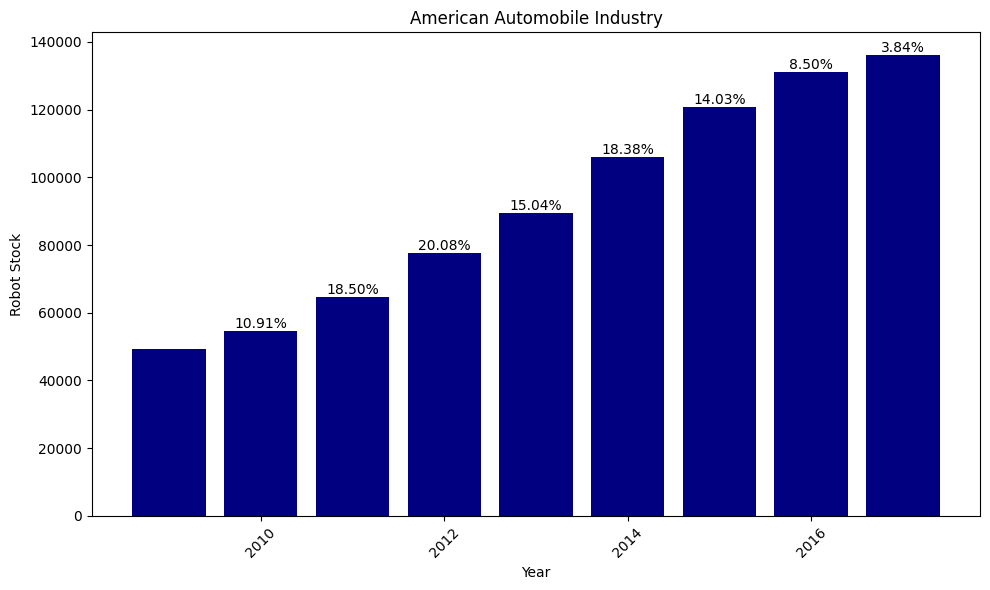

In [26]:
american_auto_summary['YoY_Percentage_Change'] = american_auto_summary['op_stock'].pct_change() * 100

# Plotting the original robot stock data
plt.figure(figsize=(10, 6))  # Adjust size as needed
bars = plt.bar(american_auto_summary['Year'], american_auto_summary['op_stock'], color='navy')  # Plot as a bar chart

plt.xlabel('Year')
plt.ylabel('Robot Stock')
plt.grid(axis='y')
plt.title('American Automobile Industry')

# Adding YoY percentage change as text on the bars
for bar, change in zip(bars, american_auto_summary['YoY_Percentage_Change']):
    y_pos = bar.get_height()  # Get the height of the bar to position the text
    if pd.notnull(change):  # Check if the change is not NaN
        plt.text(bar.get_x() + bar.get_width() / 2, y_pos, f'{change:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.grid(False)
plt.show()

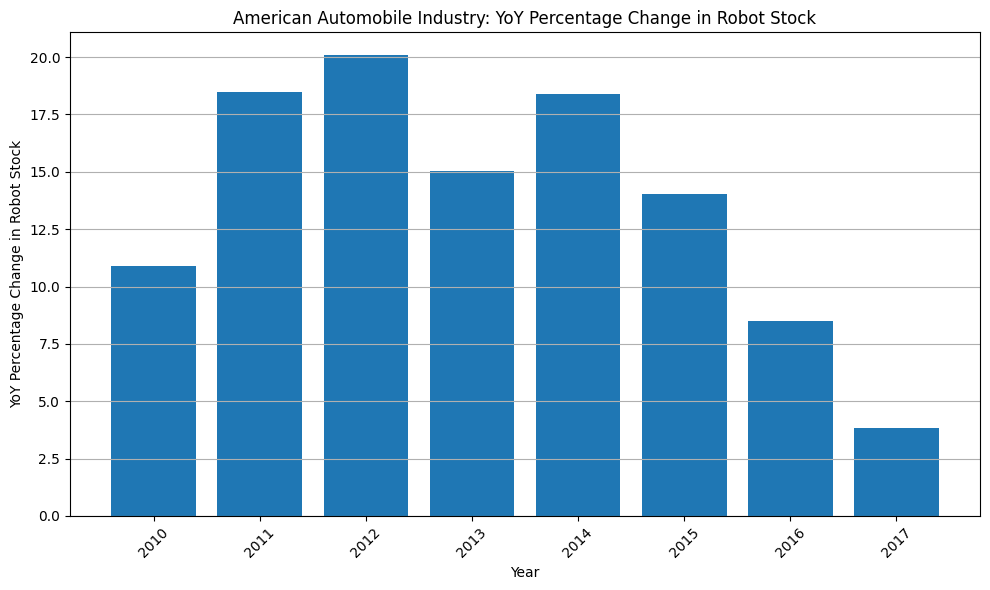

In [27]:
american_auto_summary['YoY_Percentage_Change'] = american_auto_summary['op_stock'].pct_change() * 100

# Plotting
plt.figure(figsize=(10, 6)) # Adjust size as needed
plt.bar(american_auto_summary['Year'][1:], american_auto_summary['YoY_Percentage_Change'][1:]) # Skip the first year as YoY change is not defined
plt.xlabel('Year')
plt.ylabel('YoY Percentage Change in Robot Stock')
plt.grid(axis='y')
plt.title('American Automobile Industry: YoY Percentage Change in Robot Stock')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to make room for the rotated x-axis labels
plt.show()

Text(0.5, 1.0, 'American Automobile Robot Stock')

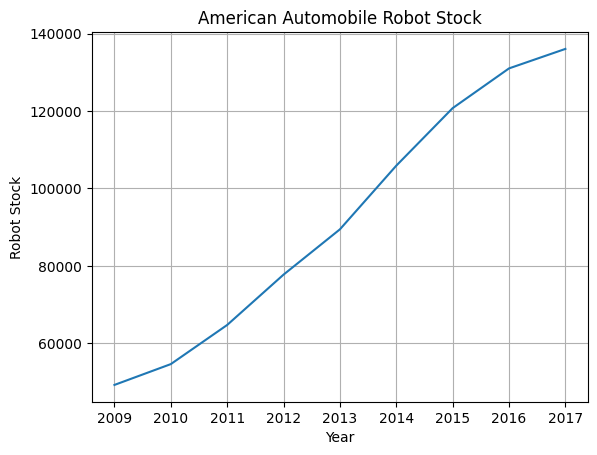

In [28]:
plt.plot(american_auto_summary['Year'], american_auto_summary['op_stock'])
plt.xlabel('Year')
plt.ylabel('Robot Stock')
plt.grid()
plt.title('American Automobile Robot Stock')

In [29]:
Ford = Automotive_Companies[Automotive_Companies['Company'] == 'FORD']
GM = Automotive_Companies[Automotive_Companies['Company'] == 'GM']
TOYOTA = Automotive_Companies[Automotive_Companies['Company'] == 'TOYOTA']
TESLA = Automotive_Companies[Automotive_Companies['Company'] == 'TSLA']

GM_dated = GM[GM['Year'] <= 2017]
GM_dated = GM_dated[GM_dated['Year'] >= 2009]
GM_dated = GM_dated.reset_index(drop=True)
GM_dated = GM_dated.groupby('Year', as_index = False).sum()

TESLA_dated = TESLA[TESLA['Year'] <=2017]
TESLA_dated = TESLA_dated[TESLA_dated['Year'] >=2009]
TESLA_dated = TESLA_dated.reset_index(drop=True)
TESLA_dated = TESLA_dated.groupby('Year', as_index = False).sum()

FORD_dated = Ford[Ford['Year'] <=2017]
FORD_dated = FORD_dated[FORD_dated['Year'] >=2009]
FORD_dated = FORD_dated.reset_index(drop=True)
FORD_dated = FORD_dated.groupby('Year', as_index = False).sum()

TOYOTA_dated = TOYOTA[TOYOTA['Year'] <=2017]
TOYOTA_dated = TOYOTA_dated[TOYOTA_dated['Year'] >=2009]
TOYOTA_dated = TOYOTA_dated.reset_index(drop=True)
TOYOTA_dated = TOYOTA_dated.groupby('Year', as_index = False).sum()

GM_dated


,Year,Company,Employees (x1000),Revenue (millions),Gross Profit,Margin,Capex,Unnamed: 7,Unnamed: 8
0,2009,GM,215.0,104589.0,104690.0,1.000966,5379.0,0.0,0.0
1,2010,GM,202.0,135592.0,4668.0,0.034427,4200.0,0.0,0.0
2,2011,GM,207.0,150276.0,7585.0,0.050474,6249.0,0.0,0.0
3,2012,GM,213.0,152256.0,4859.0,0.031913,8068.0,0.0,0.0
4,2013,GM,219.0,155427.0,3770.0,0.024256,7565.0,0.0,0.0
5,2014,GM,216.0,155929.0,2804.0,0.017983,7091.0,0.0,0.0
6,2015,GM,215.0,152356.0,9687.0,0.063581,7874.0,0.0,0.0
7,2016,GM,225.0,166380.0,9427.0,0.056659,9542.0,0.0,0.0
8,2017,GM,180.0,145588.0,9427.0,0.064751,8453.0,0.0,0.0


In [66]:
GM_dated = GM
GM_dated = GM_dated[GM_dated['Year'] >= 2009]
GM_dated = GM_dated.reset_index(drop=True)
GM_dated = GM_dated.groupby('Year', as_index = False).sum()

TESLA_dated = TESLA
TESLA_dated = TESLA_dated[TESLA_dated['Year'] >=2009]
TESLA_dated = TESLA_dated.reset_index(drop=True)
TESLA_dated = TESLA_dated.groupby('Year', as_index = False).sum()

FORD_dated = Ford
FORD_dated = FORD_dated[FORD_dated['Year'] >=2009]
FORD_dated = FORD_dated.reset_index(drop=True)
FORD_dated = FORD_dated.groupby('Year', as_index = False).sum()

TOYOTA_dated = TOYOTA
TOYOTA_dated = TOYOTA_dated[TOYOTA_dated['Year'] >=2009]
TOYOTA_dated = TOYOTA_dated.reset_index(drop=True)
TOYOTA_dated = TOYOTA_dated.groupby('Year', as_index = False).sum()

FORD_dated

,Year,Company,Employees (x1000),Revenue (millions),Gross Profit,Margin,Capex,Unnamed: 7,Unnamed: 8
0,2009,FORD,213.0,116283.0,2717.0,0.023365,4059.0,0.0,0.0
1,2010,FORD,164.0,128954.0,6561.0,0.050879,4092.0,0.0,0.0
2,2011,FORD,164.0,135605.0,20213.0,0.149058,4293.0,0.0,0.0
3,2012,FORD,171.0,133559.0,5665.0,0.042416,5488.0,0.0,0.0
4,2013,FORD,181.0,146917.0,7148.0,0.048653,6597.0,0.0,0.0
5,2014,FORD,187.0,144077.0,1231.0,0.008544,7463.0,0.0,0.0
6,2015,FORD,199.0,149558.0,7373.0,0.049299,7196.0,0.0,0.0
7,2016,FORD,201.0,151800.0,4569.0,0.030099,6992.0,0.0,0.0
8,2017,FORD,202.0,156776.0,7731.0,0.049312,7049.0,0.0,0.0
9,2018,FORD,199.0,160338.0,3677.0,0.022933,7785.0,0.0,0.0


In [72]:
%run C:\Users\andre\PyCharmProjects\pythonProject\features\functions.ipynb

Ford_employees = company_specific(FORD_dated, 'Employees (x1000)')
Ford_revenue = company_specific(FORD_dated, 'Revenue (millions)')
Ford_gross = company_specific(FORD_dated, 'Gross Profit')
Ford_margin = company_specific(FORD_dated, 'Margin')
Ford_Capex = company_specific(FORD_dated, 'Capex')

GM_employees = company_specific(GM_dated, 'Employees (x1000)')
GM_revenue = company_specific(GM_dated, 'Revenue (millions)')
GM_gross = company_specific(GM_dated, 'Gross Profit')
GM_margin = GM_dated[['Year', 'Margin']] #company_specific(GM, 'Margin')
GM_Capex = company_specific(GM_dated, 'Capex')

TOYOTA_employees = company_specific(TOYOTA_dated, 'Employees (x1000)')
TOYOTA_revenue = company_specific(TOYOTA_dated, 'Revenue (millions)')
TOYOTA_gross = company_specific(TOYOTA_dated, 'Gross Profit')
TOYOTA_margin = company_specific(TOYOTA_dated, 'Margin')
TOYOTA_Capex = company_specific(TOYOTA_dated, 'Capex')

TESLA_employees = company_specific(TESLA_dated, 'Employees (x1000)')
TESLA_revenue = company_specific(TESLA_dated, 'Revenue (millions)')
TESLA_gross = company_specific(TESLA_dated, 'Gross Profit')
TESLA_margin = company_specific(TESLA_dated, 'Margin')
TESLA_Capex = company_specific(TESLA_dated, 'Capex')

cars_op_stock = normalize(american_auto_summary[['Year','op_stock']])
cars_delivered = normalize(american_auto_summary[['Year','delivered']])

,Margin,date
0,0.080357,2009
1,0.264957,2010
2,0.303922,2011
3,0.072639,2012
4,0.226528,2013
5,0.275485,2014
6,0.228127,2015
7,0.228429,2016
8,0.188978,2017
9,0.188342,2018


In [33]:
cars_delivered = cars_delivered[cars_delivered['date'] >= 2009]
cars_delivered = cars_delivered.reset_index(drop=True)
cars_delivered = cars_delivered.groupby('date', as_index = False).sum()
cars_delivered

,date,delivered
0,2009,1.000000
1,2010,1.415372
2,2011,2.660437
3,2012,3.421953
4,2013,3.078442
5,2014,4.328244
6,2015,3.911292
7,2016,4.978942
8,2017,4.787049


In [73]:

REVENUE_AUTO = pd.DataFrame({'Date':TESLA_revenue['date'], 'GM': GM_revenue['Revenue (millions)'],
                             'FORD': Ford_revenue['Revenue (millions)'], 'TOYOTA': TOYOTA_revenue['Revenue (millions)'], 
                             'TESLA': TESLA_revenue['Revenue (millions)']})
EMPLOYEE_AUTO = pd.DataFrame({'Date': GM_dated['Year'], 'GM': GM_employees['Employees (x1000)'],
                              'FORD': Ford_employees['Employees (x1000)'], 'TOYOTA': TOYOTA_employees['Employees (x1000)'],
                              'TESLA': TESLA_employees['Employees (x1000)']})

MARGIN_AUTO = pd.DataFrame({'Date': TESLA_margin['date'], 'GM': GM_margin['Margin'],
                              'FORD': Ford_margin['Margin'], 'TOYOTA': TOYOTA_margin['Margin'],
                              'TESLA': TESLA_margin['Margin']})
GP_AUTO = pd.DataFrame({'Date': TESLA_gross['date'], 'GM': GM_gross['Gross Profit'],
                              'FORD': Ford_gross['Gross Profit'], 'TOYOTA': TOYOTA_gross['Gross Profit'],
                              'TESLA': TESLA_gross['Gross Profit']})


In [77]:
REVENUE_AUTO['mean'] = REVENUE_AUTO[['GM', 'FORD', 'TOYOTA', 'TESLA']].mean(axis = 1)
REVENUE_AUTO['std'] = REVENUE_AUTO[['GM', 'FORD', 'TOYOTA', 'TESLA']].std(axis = 1)

columns = ['GM', 'FORD', 'TOYOTA', 'TESLA']
for col in columns:
    REVENUE_AUTO[f'{col}_Z'] = (REVENUE_AUTO[col] - REVENUE_AUTO['mean']) / REVENUE_AUTO['std']

REVENUE_AUTO

,Date,GM,FORD,TOYOTA,TESLA,mean,std,GM_Z,FORD_Z,TOYOTA_Z,TESLA_Z
0,2009,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN
1,2010,1.296427,1.108967,0.923106,1.044643,1.093286,0.155820,1.303693,0.100637,-1.092156,-0.312174
2,2011,1.436824,1.166164,0.925187,1.821429,1.337401,0.384452,0.258610,-0.445406,-1.072211,1.259007
3,2012,1.455755,1.148569,0.905214,3.687500,1.799259,1.278823,-0.268610,-0.508820,-0.699116,1.476546
4,2013,1.486074,1.263443,1.074752,17.973214,5.449371,8.350921,-0.474594,-0.501253,-0.523849,1.499696
5,2014,1.490874,1.239020,1.251459,28.553571,8.133731,13.613720,-0.487953,-0.506453,-0.505539,1.499946
6,2015,1.456712,1.286155,1.326600,36.125000,10.048617,17.384408,-0.494231,-0.504041,-0.501715,1.499987
7,2016,1.590798,1.305436,1.383522,62.500000,16.694939,30.536945,-0.494619,-0.503963,-0.501406,1.499988
8,2017,1.392001,1.348228,1.344266,104.982143,27.266659,51.810327,-0.499411,-0.500256,-0.500333,1.500000
9,2018,1.405970,1.378860,1.431083,191.616071,48.957996,95.105386,-0.499993,-0.500278,-0.499729,1.500000


In [75]:
MARGIN_AUTO['mean'] = MARGIN_AUTO[['GM', 'FORD', 'TOYOTA', 'TESLA']].mean(axis = 1)
MARGIN_AUTO['std'] = MARGIN_AUTO[['GM', 'FORD', 'TOYOTA', 'TESLA']].std(axis = 1)

columns = ['GM', 'FORD', 'TOYOTA', 'TESLA']
for col in columns:
    MARGIN_AUTO[f'{col}_Z'] = (MARGIN_AUTO[col] - MARGIN_AUTO['mean']) / MARGIN_AUTO['std']

for col in columns:
    MARGIN_AUTO[f'{col} Cumulative'] = MARGIN_AUTO[f'{col}_Z'].cumsum()
MARGIN_AUTO

,Date,GM,FORD,TOYOTA,TESLA,mean,std,GM_Z,FORD_Z,TOYOTA_Z,TESLA_Z,GM Cumulative,FORD Cumulative,TOYOTA Cumulative,TESLA Cumulative
0,2009,1.000966,1.000000,1.000000,1.000000,1.000241,0.000483,1.500000,-0.500000,-0.500000,-0.500000,1.500000,-0.500000,-0.500000,-0.500000
1,2010,0.034427,2.177518,-0.346638,3.297246,1.290638,1.738943,-0.722399,0.510011,-0.941535,1.153924,0.777601,0.010011,-1.441535,0.653924
2,2011,0.050474,6.379427,-1.097903,3.782135,2.278533,3.437185,-0.648222,1.193097,-0.982326,0.437452,0.129379,1.203108,-2.423861,1.091375
3,2012,0.031913,1.815321,-0.852182,0.903955,0.474752,1.145746,-0.386507,1.170041,-1.158140,0.374606,-0.257128,2.373148,-3.582001,1.465981
4,2013,0.024256,2.082280,-2.665916,2.819010,0.564907,2.457229,-0.220025,0.617514,-1.314824,0.917335,-0.477153,2.990662,-4.896825,2.383316
5,2014,0.017983,0.365671,-3.972903,3.428254,-0.040249,3.036689,0.019176,0.133672,-1.295047,1.142199,-0.457977,3.124334,-6.191872,3.525515
6,2015,0.063581,2.109897,-4.497494,2.838908,0.128723,3.300317,-0.019738,0.600298,-1.401749,0.821189,-0.477715,3.724632,-7.593621,4.346704
7,2016,0.056659,1.288178,-4.474578,2.842667,-0.071768,3.148789,0.040786,0.431895,-1.398255,0.925573,-0.436929,4.156527,-8.991876,5.272278
8,2017,0.064751,2.110487,-3.218176,2.351723,0.327196,2.576650,-0.101855,0.692097,-1.375962,0.785720,-0.538784,4.848623,-10.367838,6.057998
9,2018,0.053832,0.981485,-3.637561,2.343807,-0.064609,2.560911,0.046250,0.408485,-1.395188,0.940453,-0.492534,5.257109,-11.763026,6.998451


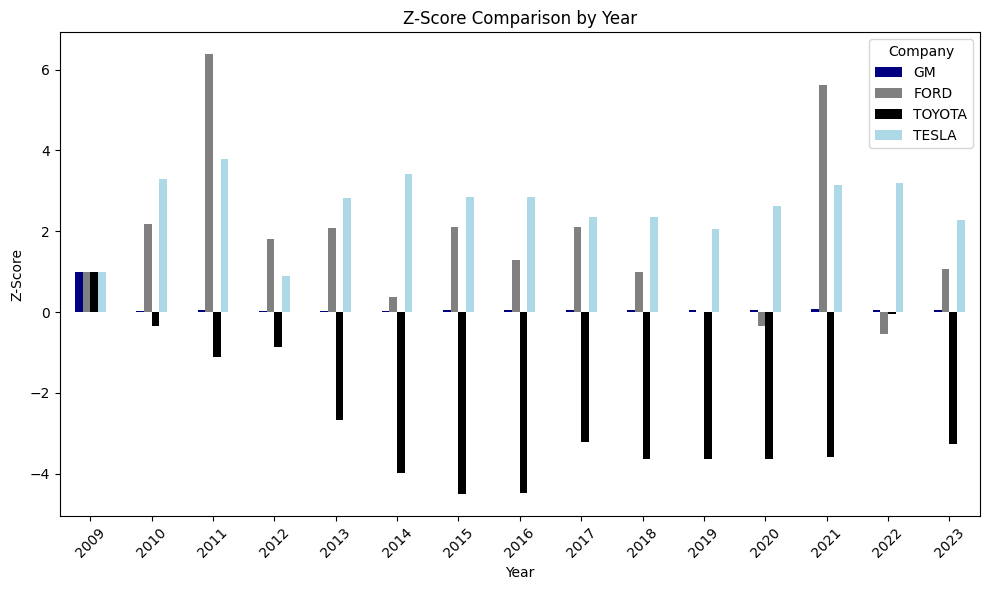

In [76]:
z_score_columns = ['GM', 'FORD', 'TOYOTA', 'TESLA']

# Define a color palette with navy, grey, black, and light blue
custom_palette = ['#000080', '#808080', '#000000', '#ADD8E6']

# Plotting Z-scores by Year for each company with the specified color palette
MARGIN_AUTO.plot(kind='bar', x='Date', y=z_score_columns, figsize=(10, 6), color=custom_palette)
plt.title('Z-Score Comparison by Year')
plt.ylabel('Z-Score')
plt.xlabel('Year')
plt.xticks(rotation=45)  # Rotates the x-axis labels to make them more readable
plt.legend(title='Company')
plt.tight_layout()  # Adjusts subplots to fit into the figure area.
plt.show()

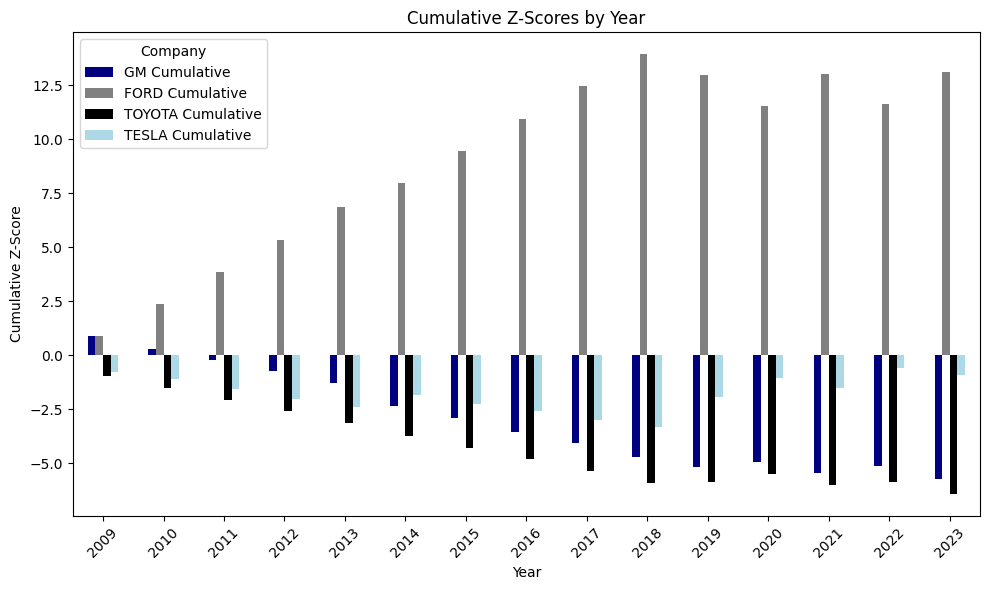

In [65]:
cumulative_z_score_columns = ['GM Cumulative', 'FORD Cumulative', 'TOYOTA Cumulative', 'TESLA Cumulative']

# Plotting Cumulative Z-scores by Year for each company
MARGIN_AUTO.plot(kind='bar', x='Date', y=cumulative_z_score_columns, figsize=(10, 6), color=custom_palette)
plt.title('Cumulative Z-Scores by Year')
plt.ylabel('Cumulative Z-Score')
plt.xlabel('Year')
plt.xticks(rotation=45)  # Rotates the x-axis labels to make them more readable
plt.legend(title='Company')
plt.tight_layout()  # Adjusts subplots to fit into the figure area.
plt.show()

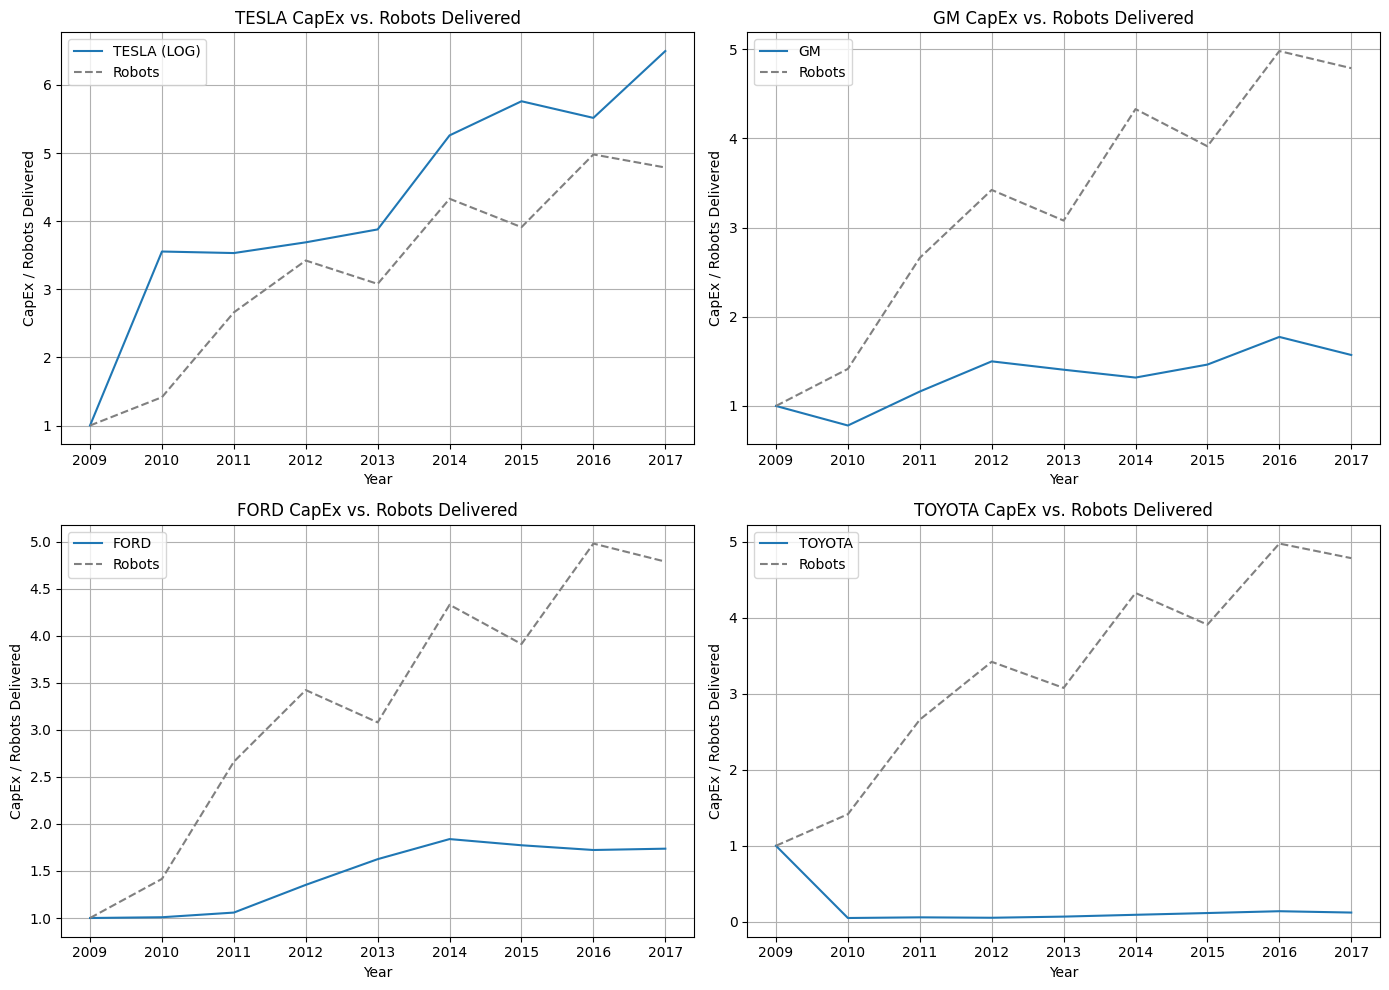

In [78]:
CAPEX_DF = {
    'Year': TESLA_Capex['date'],
    'TESLA': TESLA_Capex['Capex'],  # Productivity change values
    'GM': GM_Capex['Capex'],
    'TOYOTA': TOYOTA_Capex['Capex'],  # Productivity change values
    'FORD': Ford_Capex['Capex'],
    
}

CAPEX_DF = pd.DataFrame(CAPEX_DF)
CAPEX_DF = CAPEX_DF[CAPEX_DF['Year'] <=2017]
'''
plt.plot(CAPEX_DF['Year'], np.log(CAPEX_DF['TESLA']), label = 'TESLA (LOG)')
plt.plot(CAPEX_DF['Year'], CAPEX_DF['GM'], label = 'GM')
plt.plot(CAPEX_DF['Year'], CAPEX_DF['FORD'], label = 'Ford')
plt.plot(CAPEX_DF['Year'], CAPEX_DF['TOYOTA'], label = 'TOYOTA')

plt.plot(cars_delivered['date'], cars_delivered['delivered'], label = 'robots')
plt.legend()
plt.grid()
'''
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 subplot grid, adjust figsize as needed
companies = ['TESLA', 'GM', 'FORD', 'TOYOTA']

# Assuming the 'Year' column in CAPEX_DF and 'date' column in cars_delivered are directly comparable
for i, company in enumerate(companies):
    ax = axs[i//2, i%2]  # Determines the subplot position
    if company == 'TESLA':
        ax.plot(CAPEX_DF['Year'], np.log(CAPEX_DF[company]) + 1, label=f'{company} (LOG)')
    else:
        ax.plot(CAPEX_DF['Year'], CAPEX_DF[company], label=company)
    ax.plot(cars_delivered['date'], cars_delivered['delivered'], label='Robots', linestyle='--', color = 'grey')
    
    ax.set_title(f'{company} CapEx vs. Robots Delivered')
    ax.set_xlabel('Year')
    ax.set_ylabel('CapEx / Robots Delivered')
    ax.legend()
    ax.grid(True)

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()


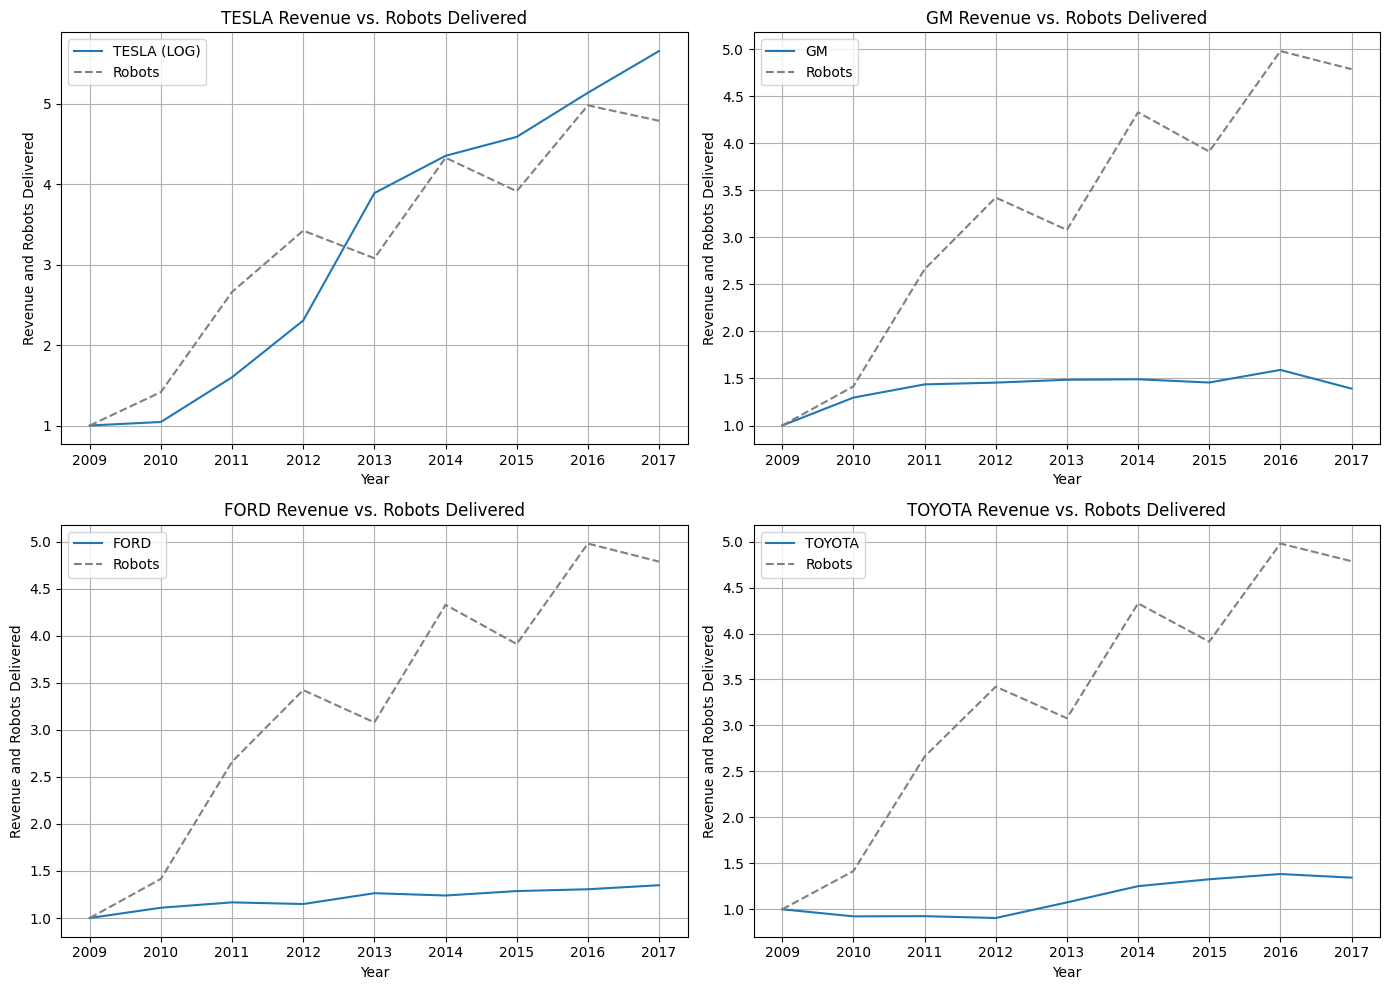

In [79]:
REVENUE_DF = {
    'Year': TESLA_revenue['date'],
    'TESLA': TESLA_revenue['Revenue (millions)'],  # Productivity change values
    'GM': GM_revenue['Revenue (millions)'],
    'TOYOTA': TOYOTA_revenue['Revenue (millions)'],  # Productivity change values
    'FORD': Ford_revenue['Revenue (millions)'],
    
}

REVENUE_DF = pd.DataFrame(REVENUE_DF)
REVENUE_DF = REVENUE_DF[REVENUE_DF['Year'] <=2017]
'''
plt.plot(CAPEX_DF['Year'], np.log(CAPEX_DF['TESLA']), label = 'TESLA (LOG)')
plt.plot(CAPEX_DF['Year'], CAPEX_DF['GM'], label = 'GM')
plt.plot(CAPEX_DF['Year'], CAPEX_DF['FORD'], label = 'Ford')
plt.plot(CAPEX_DF['Year'], CAPEX_DF['TOYOTA'], label = 'TOYOTA')

plt.plot(cars_delivered['date'], cars_delivered['delivered'], label = 'robots')
plt.legend()
plt.grid()
'''
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 subplot grid, adjust figsize as needed
companies = ['TESLA', 'GM', 'FORD', 'TOYOTA']

# Assuming the 'Year' column in CAPEX_DF and 'date' column in cars_delivered are directly comparable
for i, company in enumerate(companies):
    ax = axs[i//2, i%2]  # Determines the subplot position
    if company == 'TESLA':
        ax.plot(REVENUE_DF['Year'], np.log(REVENUE_DF[company]) + 1, label=f'{company} (LOG)')
    else:
        ax.plot(REVENUE_DF['Year'], REVENUE_DF[company], label=company)
    ax.plot(cars_delivered['date'], cars_delivered['delivered'], label='Robots', linestyle='--', color = 'grey')
    
    ax.set_title(f'{company} Revenue vs. Robots Delivered')
    ax.set_xlabel('Year')
    ax.set_ylabel('Revenue and Robots Delivered')
    ax.legend()
    ax.grid(True)

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()

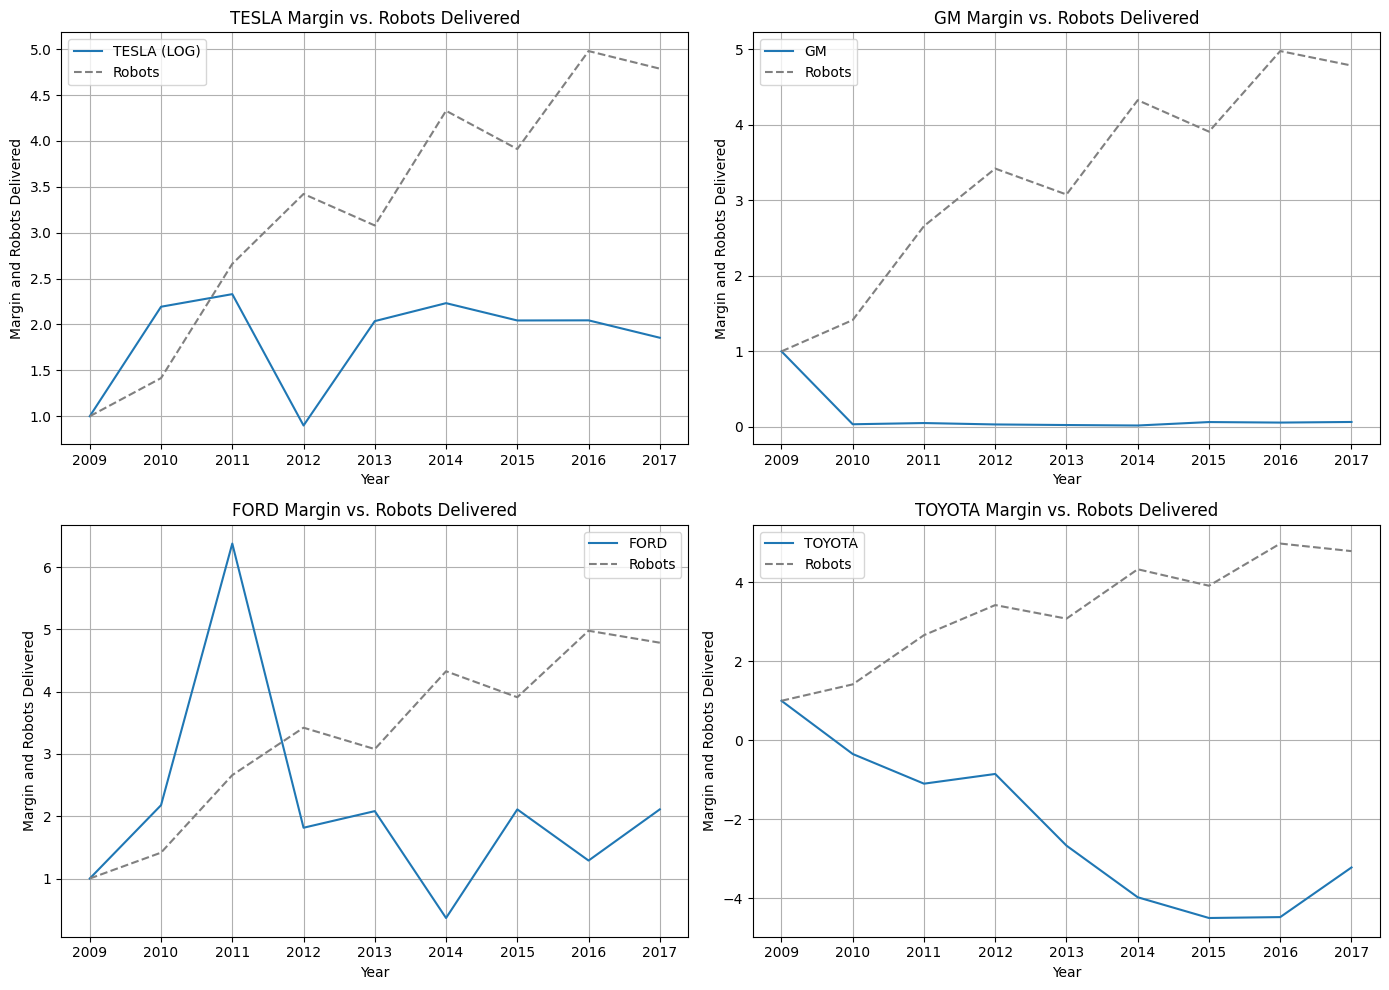

In [86]:
MARGIN_DF = {
    'Year': TESLA_margin['date'],
    'TESLA': TESLA_margin['Margin'],  # Productivity change values
    'GM': GM_margin['Margin'],
    'TOYOTA': TOYOTA_margin['Margin'],  # Productivity change values
    'FORD': Ford_margin['Margin'],
    
}

MARGIN_DF = pd.DataFrame(MARGIN_DF)
MARGIN_DF = MARGIN_DF[MARGIN_DF['Year'] <=2017]
'''
plt.plot(CAPEX_DF['Year'], np.log(CAPEX_DF['TESLA']), label = 'TESLA (LOG)')
plt.plot(CAPEX_DF['Year'], CAPEX_DF['GM'], label = 'GM')
plt.plot(CAPEX_DF['Year'], CAPEX_DF['FORD'], label = 'Ford')
plt.plot(CAPEX_DF['Year'], CAPEX_DF['TOYOTA'], label = 'TOYOTA')

plt.plot(cars_delivered['date'], cars_delivered['delivered'], label = 'robots')
plt.legend()
plt.grid()
'''
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 subplot grid, adjust figsize as needed
companies = ['TESLA', 'GM', 'FORD', 'TOYOTA']

# Assuming the 'Year' column in CAPEX_DF and 'date' column in cars_delivered are directly comparable
for i, company in enumerate(companies):
    ax = axs[i//2, i%2]  # Determines the subplot position
    if company == 'TESLA':
        ax.plot(MARGIN_DF['Year'], np.log(MARGIN_DF[company]) + 1, label=f'{company} (LOG)')
    else:
        ax.plot(MARGIN_DF['Year'], MARGIN_DF[company], label=company)
    ax.plot(cars_delivered['date'], cars_delivered['delivered'], label='Robots', linestyle='--', color = 'grey')
    
    ax.set_title(f'{company} Margin vs. Robots Delivered')
    ax.set_xlabel('Year')
    ax.set_ylabel('Margin and Robots Delivered')
    ax.legend()
    ax.grid(True)

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()

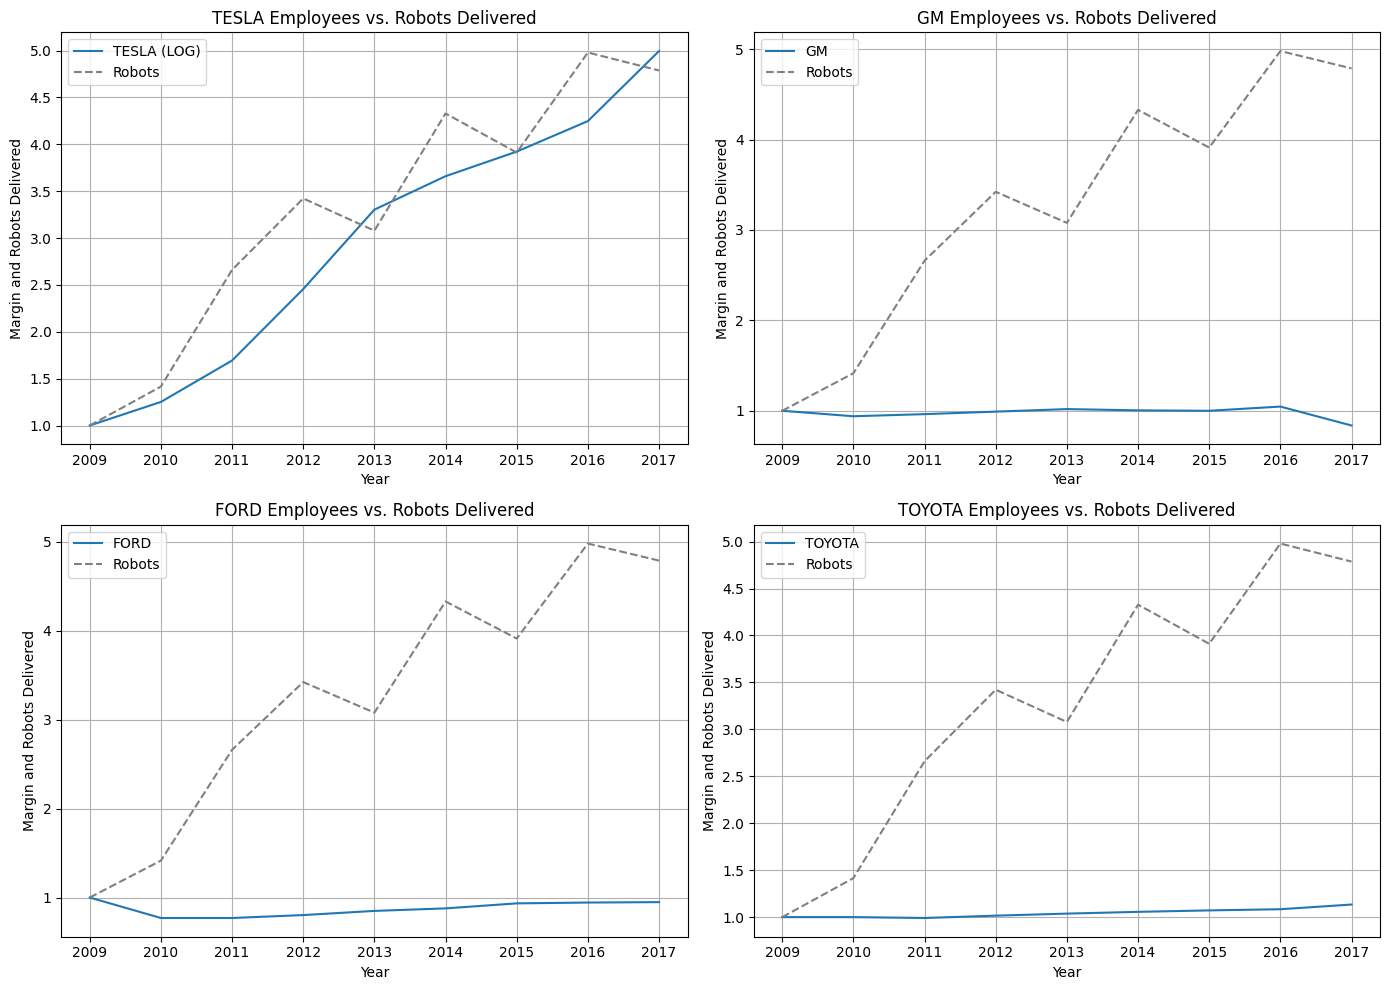

In [81]:
EMPLOYEE_DF = {
    'Year': TESLA_employees['date'],
    'TESLA': TESLA_employees['Employees (x1000)'],  # Productivity change values
    'GM': GM_employees['Employees (x1000)'],
    'TOYOTA': TOYOTA_employees['Employees (x1000)'],  # Productivity change values
    'FORD': Ford_employees['Employees (x1000)'],
    
}

EMPLOYEE_DF = pd.DataFrame(EMPLOYEE_DF)
EMPLOYEE_DF = EMPLOYEE_DF[EMPLOYEE_DF['Year'] <=2017]
'''
plt.plot(CAPEX_DF['Year'], np.log(CAPEX_DF['TESLA']), label = 'TESLA (LOG)')
plt.plot(CAPEX_DF['Year'], CAPEX_DF['GM'], label = 'GM')
plt.plot(CAPEX_DF['Year'], CAPEX_DF['FORD'], label = 'Ford')
plt.plot(CAPEX_DF['Year'], CAPEX_DF['TOYOTA'], label = 'TOYOTA')

plt.plot(cars_delivered['date'], cars_delivered['delivered'], label = 'robots')
plt.legend()
plt.grid()
'''
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 subplot grid, adjust figsize as needed
companies = ['TESLA', 'GM', 'FORD', 'TOYOTA']

# Assuming the 'Year' column in CAPEX_DF and 'date' column in cars_delivered are directly comparable
for i, company in enumerate(companies):
    ax = axs[i//2, i%2]  # Determines the subplot position
    if company == 'TESLA':
        ax.plot(EMPLOYEE_DF['Year'], np.log(EMPLOYEE_DF[company]) + 1, label=f'{company} (LOG)')
    else:
        ax.plot(EMPLOYEE_DF['Year'], EMPLOYEE_DF[company], label=company)
    ax.plot(cars_delivered['date'], cars_delivered['delivered'], label='Robots', linestyle='--', color = 'grey')
    
    ax.set_title(f'{company} Employees vs. Robots Delivered')
    ax.set_xlabel('Year')
    ax.set_ylabel('Margin and Robots Delivered')
    ax.legend()
    ax.grid(True)

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()

In [43]:
#CAPEX_DF.to_csv('TESTDF.csv', index =False)
CAPEX_DF

CAPEX_DF2 = pd.DataFrame(CAPEX_DF)
#CAPEX_DF2['delivered'] = cars_delivered['delivered']
CAPEX_DF2 = CAPEX_DF[CAPEX_DF['Year'] <=2017]
cars_delivered['delivered']
MARGIN_DF

,Year,TESLA,GM,TOYOTA,FORD
0,2009,1.000000,1.000000,1.000000,1.000000
1,2010,12.857143,0.780814,0.048961,1.008130
2,2011,12.571429,1.161740,0.057598,1.057650
3,2012,14.714286,1.499907,0.052179,1.352057
4,2013,17.785714,1.406395,0.067235,1.625277
5,2014,70.714286,1.318275,0.091229,1.838630
6,2015,116.714286,1.463841,0.114351,1.772850
7,2016,91.428571,1.773936,0.138247,1.722592
8,2017,243.857143,1.571482,0.120612,1.736635


In [89]:
companies = ['GM', 'FORD', 'TOYOTA', 'TESLA']
for company in companies:
    
    data = {
        'Capex': CAPEX_DF[company], 
        'robots': cars_delivered['delivered']# Productivity change values
    }
    
    df = pd.DataFrame(data)
    
    # Defining the dependent and independent variables
    X = df[['Capex']]  # Independent variables
    y = df['robots']           # Dependent variable
    
    # Adding a constant to the model (intercept)
    X = sm.add_constant(X)
    
    # Building the regression model
    model = sm.OLS(y, X).fit()
    
    # Viewing the summary of the regression
    print("###########", company, "###########")
    print(model.summary())



########### GM ###########
                            OLS Regression Results                            
Dep. Variable:                 robots   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     28.89
Date:                Tue, 09 Apr 2024   Prob (F-statistic):            0.00104
Time:                        22:11:26   Log-Likelihood:                -7.9405
No. Observations:                   9   AIC:                             19.88
Df Residuals:                       7   BIC:                             20.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1996    

C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)


In [83]:
companies = ['GM', 'FORD', 'TOYOTA', 'TESLA']
for company in companies:
    
    data = {
        'Revenue': REVENUE_DF[company], 
        'robots': cars_delivered['delivered']# Productivity change values
    }
    
    df = pd.DataFrame(data)
    
    # Defining the dependent and independent variables
    X = df[['Revenue']]  # Independent variables
    y = df['robots']           # Dependent variable
    
    # Adding a constant to the model (intercept)
    X = sm.add_constant(X)
    
    # Building the regression model
    model = sm.OLS(y, X).fit()
    
    # Viewing the summary of the regression
    print("###########", company, "###########")
    print(model.summary())

########### GM ###########
                            OLS Regression Results                            
Dep. Variable:                 robots   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     12.02
Date:                Tue, 09 Apr 2024   Prob (F-statistic):             0.0104
Time:                        22:01:37   Log-Likelihood:                -10.797
No. Observations:                   9   AIC:                             25.59
Df Residuals:                       7   BIC:                             25.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9233    

C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)


In [88]:
companies = ['GM', 'FORD', 'TOYOTA', 'TESLA']
for company in companies:
    
    data = {
        'Margin': MARGIN_DF[company], 
        'robots': cars_delivered['delivered']# Productivity change values
    }
    
    df = pd.DataFrame(data)
    
    # Defining the dependent and independent variables
    X = df[['Margin']]  # Independent variables
    y = df['robots']           # Dependent variable
    
    # Adding a constant to the model (intercept)
    X = sm.add_constant(X)
    
    # Building the regression model
    model = sm.OLS(y, X).fit()
    
    # Viewing the summary of the regression
    print("###########", company, "###########")
    print(model.summary())

########### GM ###########
                            OLS Regression Results                            
Dep. Variable:                 robots   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     3.820
Date:                Tue, 09 Apr 2024   Prob (F-statistic):             0.0916
Time:                        22:04:29   Log-Likelihood:                -13.336
No. Observations:                   9   AIC:                             30.67
Df Residuals:                       7   BIC:                             31.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6768    

C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)


In [101]:
companies = ['GM', 'FORD', 'TOYOTA', 'TESLA']
for company in companies:
    
    data = {
        'Employees': EMPLOYEE_DF[company], 
        'Capex': CAPEX_DF[company],
        'margin': MARGIN_DF[company],
        'robots': cars_delivered['delivered'],# Productivity change values
        'Revenue': REVENUE_DF[company]
    }
    
    df = pd.DataFrame(data)
    
    # Defining the dependent and independent variables
    X = df[['Employees', 'robots']]  # Independent variables
    y = df['margin']           # Dependent variable
    
    # Adding a constant to the model (intercept)
    X = sm.add_constant(X)
    
    # Building the regression model
    model = sm.OLS(y, X).fit()
    
    # Viewing the summary of the regression
    print("###########", company, "###########")
    print(model.summary())

########### GM ###########
                            OLS Regression Results                            
Dep. Variable:                 margin   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     1.698
Date:                Wed, 10 Apr 2024   Prob (F-statistic):              0.260
Time:                        01:51:58   Log-Likelihood:               0.039510
No. Observations:                   9   AIC:                             5.921
Df Residuals:                       6   BIC:                             6.513
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1201    

C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)


In [61]:
MARGIN_DF


,Year,TESLA,GM,TOYOTA,FORD
0,2009,1.000000,1.000000,1.000000,1.000000
1,2010,12.857143,0.780814,0.048961,1.008130
2,2011,12.571429,1.161740,0.057598,1.057650
3,2012,14.714286,1.499907,0.052179,1.352057
4,2013,17.785714,1.406395,0.067235,1.625277
5,2014,70.714286,1.318275,0.091229,1.838630
6,2015,116.714286,1.463841,0.114351,1.772850
7,2016,91.428571,1.773936,0.138247,1.722592
8,2017,243.857143,1.571482,0.120612,1.736635


In [674]:
MARGIN_AUTO

,Date,GM,FORD,TOYOTA,TESLA,mean,std,GM_Z,FORD_Z,TOYOTA_Z,TESLA_Z,GM Cumulative,FORD Cumulative,TOYOTA Cumulative,TESLA Cumulative
0,2009,1.000966,1.000000,1.000000,1.000000,1.000241,0.000483,1.500000,-0.500000,-0.500000,-0.500000,1.500000,-0.500000,-0.500000,-0.500000
1,2010,0.034427,2.177518,-0.346638,3.297246,1.290638,1.738943,-0.722399,0.510011,-0.941535,1.153924,0.777601,0.010011,-1.441535,0.653924
2,2011,0.050474,6.379427,-1.097903,3.782135,2.278533,3.437185,-0.648222,1.193097,-0.982326,0.437452,0.129379,1.203108,-2.423861,1.091375
3,2012,0.031913,1.815321,-0.852182,0.903955,0.474752,1.145746,-0.386507,1.170041,-1.158140,0.374606,-0.257128,2.373148,-3.582001,1.465981
4,2013,0.024256,2.082280,-2.665916,2.819010,0.564907,2.457229,-0.220025,0.617514,-1.314824,0.917335,-0.477153,2.990662,-4.896825,2.383316
5,2014,0.017983,0.365671,-3.972903,3.428254,-0.040249,3.036689,0.019176,0.133672,-1.295047,1.142199,-0.457977,3.124334,-6.191872,3.525515
6,2015,0.063581,2.109897,-4.497494,2.838908,0.128723,3.300317,-0.019738,0.600298,-1.401749,0.821189,-0.477715,3.724632,-7.593621,4.346704
7,2016,0.056659,1.288178,-4.474578,2.842667,-0.071768,3.148789,0.040786,0.431895,-1.398255,0.925573,-0.436929,4.156527,-8.991876,5.272278
8,2017,0.064751,2.110487,-3.218176,2.351723,0.327196,2.576650,-0.101855,0.692097,-1.375962,0.785720,-0.538784,4.848623,-10.367838,6.057998
9,2018,0.053832,0.981485,-3.637561,2.343807,-0.064609,2.560911,0.046250,0.408485,-1.395188,0.940453,-0.492534,5.257109,-11.763026,6.998451


KeyError: 'Combined Robots Delivered'

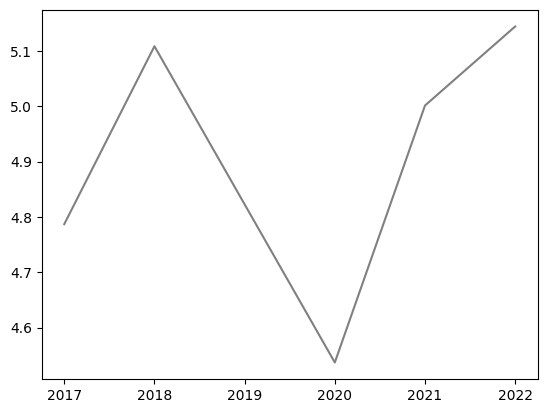

In [102]:
intercept_ford = -1.8683
std_f = 1.012
slope_ford = 3.5380
std_ford = 0.677

intercept_tesla = 0.0127
std_t = 0.465
slope_tesla = 2.4665
std_tesla = 0.005

intercept_GM = -2.1996
std_gm = 1.044
slope_GM = 4.1230
std_GM = 0.767

robots_delivered_2017 = 4.787049

CAPEX_DF_FULL = {
    'Year': TESLA_Capex['date'],
    'TESLA': np.log(TESLA_Capex['Capex']),  # Productivity change values
    'GM': GM_Capex['Capex'],
    'TOYOTA': TOYOTA_Capex['Capex'],  # Productivity change values
    'FORD': Ford_Capex['Capex'],
    
}

CAPEX_DF_FULL = pd.DataFrame(CAPEX_DF_FULL)

CAPEX_DF_FULL['delivered'] = cars_delivered['delivered']
FORECAST1 = CAPEX_DF_FULL[CAPEX_DF_FULL['Year']>=2018].copy()
FORECAST1['delivered'] = (FORECAST1['FORD'])*slope_ford + intercept_ford + robots_delivered_2017
FORECAST1 = FORECAST1.reset_index(drop=True)



CAPEX_DF_FULL['TESLA FORECAST'] = (CAPEX_DF_FULL['TESLA'])*slope_tesla + intercept_tesla
CAPEX_DF_FULL['TESLA FORECAST'] = np.log(CAPEX_DF_FULL['TESLA FORECAST'] + 1)


CAPEX_DF_FULL['FORD FORECAST'] = (CAPEX_DF_FULL['FORD'])*slope_ford + intercept_ford + robots_delivered_2017

CAPEX_DF_FULL['GM FORECAST'] = (CAPEX_DF_FULL['GM'])*slope_GM + intercept_GM + robots_delivered_2017


CAPEX_DF_FULL['TESLA Robots Delivered'] = np.nan

%run C:\Users\andre\PyCharmProjects\pythonProject\features\functions.ipynb
actuals = {'Year': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           'delivered': [28, 30, 33, 38, 41, 46, 55, 47, 39, 52, 56]
}
#https://ifr.org/img/worldrobotics/Executive_Summary_WR_Industrial_Robots_2023.pdf

American_Robot_purchase_actual = pd.DataFrame(actuals)
norm_robots_actual = normalize(American_Robot_purchase_actual)
norm_robots_actual = norm_robots_actual[norm_robots_actual['date'] >= 2017] + (4.787049 - 1.642857)
norm_robots_actual['Year'] = [2017, 2018, 2019, 2020, 2021, 2022]

plt.plot(norm_robots_actual['Year'], norm_robots_actual['delivered'], label = 'Robot Deliveries', color = 'grey')



# Fill in the actual deliveries up to 2017
for year, delivery in cars_delivered.itertuples(index=False):
    CAPEX_DF_FULL.loc[CAPEX_DF_FULL['Year'] == year, 'TESLA Robots Delivered'] = delivery

# Append forecasted deliveries for Tesla and Ford for years > 2017
# This step assumes you want to overlay or choose between Ford and Tesla forecasts based on some criteria
# For simplicity, let's just assume you're combining them directly or choosing one based on available data
CAPEX_DF_FULL.loc[CAPEX_DF_FULL['Year'] > 2017, 'TESLA Robots Delivered'] = CAPEX_DF_FULL['TESLA FORECAST']
plotting_DF = CAPEX_DF_FULL[CAPEX_DF_FULL['Year'] >=2017]
#################!!!!!!!!!
plt.plot(plotting_DF['Year'], (plotting_DF['Combined Robots Delivered']), linestyle='--') 
plt.plot(cars_delivered['date'], cars_delivered['delivered'], label='TESLA')

for year, delivery in cars_delivered.itertuples(index=False):
    CAPEX_DF_FULL.loc[CAPEX_DF_FULL['Year'] == year, 'TESLA Robots Delivered'] = delivery

# Append forecasted deliveries for Tesla and Ford for years > 2017
# This step assumes you want to overlay or choose between Ford and Tesla forecasts based on some criteria
# For simplicity, let's just assume you're combining them directly or choosing one based on available data
CAPEX_DF_FULL.loc[CAPEX_DF_FULL['Year'] > 2017, 'TESLA Robots Delivered'] = CAPEX_DF_FULL['TESLA FORECAST']
plotting_DF = CAPEX_DF_FULL[CAPEX_DF_FULL['Year'] >=2017]
#################!!!!!!!!!
plt.plot(plotting_DF['Year'], (plotting_DF['TESLA Robots Delivered']), linestyle='--', label = 'TESLA', color = 'orange') 
plt.plot(cars_delivered['date'], cars_delivered['delivered'],  linestyle='--', color = 'yellow')

CAPEX_DF_FULL['FORD Robots Delivered2'] = np.nan

# Fill in the actual deliveries up to 2017
for year, delivery in cars_delivered.itertuples(index=False):
    CAPEX_DF_FULL.loc[CAPEX_DF_FULL['Year'] == year, 'FORD Robots Delivered2'] = delivery

# Append forecasted deliveries for Tesla and Ford for years > 2017
# This step assumes you want to overlay or choose between Ford and Tesla forecasts based on some criteria
# For simplicity, let's just assume you're combining them directly or choosing one based on available data
CAPEX_DF_FULL.loc[CAPEX_DF_FULL['Year'] > 2017, 'FORD Robots Delivered2'] = CAPEX_DF_FULL['FORD FORECAST']
#################!!!!!!!!!
plt.plot(CAPEX_DF_FULL['Year'], (CAPEX_DF_FULL['FORD Robots Delivered2']), linestyle='--', label='Ford', color = 'teal') 
plt.plot(cars_delivered['date'], cars_delivered['delivered'], color = 'grey')


########################################################################################################################################################################
CAPEX_DF_FULL['GM Robots Delivered3'] = np.nan

# Fill in the actual deliveries up to 2017
for year, delivery in cars_delivered.itertuples(index=False):
    CAPEX_DF_FULL.loc[CAPEX_DF_FULL['Year'] == year, 'GM Robots Delivered3'] = delivery

# Append forecasted deliveries for Tesla and Ford for years > 2017
# This step assumes you want to overlay or choose between Ford and Tesla forecasts based on some criteria
# For simplicity, let's just assume you're combining them directly or choosing one based on available data
CAPEX_DF_FULL.loc[CAPEX_DF_FULL['Year'] > 2017, 'GM Robots Delivered3'] = CAPEX_DF_FULL['GM FORECAST']

#plt.plot(CAPEX_DF_FULL['Year'], (CAPEX_DF_FULL['GM Robots Delivered3']), linestyle='--', label='GM') 
#plt.plot(cars_delivered['date'], cars_delivered['delivered'], color = 'grey')

CAPEX_DF_FULL['avg'] = (CAPEX_DF_FULL['GM Robots Delivered3']+CAPEX_DF_FULL['FORD Robots Delivered2'] + plotting_DF['TESLA Robots Delivered']) / 3

CAPEX_DF_FULL['avg_low'] = (-std_tesla - std_ford - std_GM + CAPEX_DF_FULL['GM Robots Delivered3']+CAPEX_DF_FULL['FORD Robots Delivered2'] + plotting_DF['TESLA Robots Delivered']) / 3

CAPEX_DF_FULL['avg_high'] = (CAPEX_DF_FULL['GM Robots Delivered3']+std_tesla + std_ford + std_GM +CAPEX_DF_FULL['FORD Robots Delivered2'] + plotting_DF['TESLA Robots Delivered']) / 3


#plt.plot(CAPEX_DF_FULL['Year'], CAPEX_DF_FULL['avg'], label = 'Average Forecast', linestyle = '--', color = 'red')
#plt.plot(CAPEX_DF_FULL['Year'], CAPEX_DF_FULL['avg_low'], label = 'Average Forecast', linestyle = '--', color = 'red')
#plt.plot(CAPEX_DF_FULL['Year'], CAPEX_DF_FULL['avg_high'], label = 'Average Forecast', linestyle = '--', color = 'red')

years = CAPEX_DF_FULL['Year']
initial_low1 = robots_delivered_2017
final_low1 = CAPEX_DF_FULL.loc[years.idxmax(), 'avg_low']
forecast_low = ([initial_low1, final_low1])
print(forecast_low)
initial_high = robots_delivered_2017

final_high = CAPEX_DF_FULL.loc[years.idxmax(), 'avg_high']
forecast_high = ([initial_high, final_high])
forecast_years = ([2017, 2023])
# Creating linear forecasts for low and high from their initial to final values
linear_low = np.linspace(initial_low, final_low, len(CAPEX_DF_FULL))
linear_high = np.linspace(initial_high, final_high, len(CAPEX_DF_FULL))

# Plotting

# Plot actual robot deliveries
#plt.plot(norm_robots_actual['Year'], norm_robots_actual['delivered'], label='Robot Deliveries', color='grey', marker='o', linestyle='')

# Plotting the average forecast as a solid line
plt.plot(forecast_years, forecast_low, color='black', linestyle = '--')
plt.plot(forecast_years, forecast_high, color='black', linestyle = '--')

# Filling between the linear high and low forecasts
plt.fill_between(forecast_years,forecast_low, forecast_high, color='teal', alpha=0.2, label='Average Forecast Range')



plt.grid()
plt.xlabel('Year')
plt.ylabel('Delivered')
plt.title('Actual Robot Deliveries and Forecast (2018-2022)')
plt.legend()
plt.show()

[4.787049, 7.542756840933808]


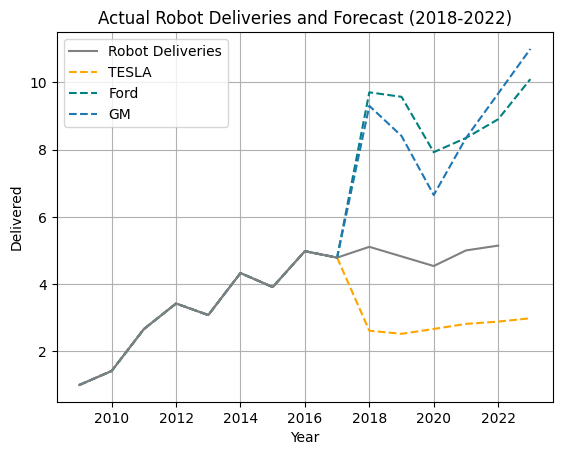

In [105]:
intercept_ford = -1.8683
std_f = 1.012
slope_ford = 3.5380
std_ford = 0.677

intercept_tesla = 0.0127#2.4665
std_t = 0.465
slope_tesla = 2.4665#0.0127
std_tesla = 0.005

intercept_GM = -2.1996
std_gm = 1.044
slope_GM = 4.1230
std_GM = 0.767

robots_delivered_2017 = 4.787049

CAPEX_DF_FULL = {
    'Year': TESLA_Capex['date'],
    'TESLA': np.log(TESLA_Capex['Capex']),  # Productivity change values
    'GM': GM_Capex['Capex'],
    'TOYOTA': TOYOTA_Capex['Capex'],  # Productivity change values
    'FORD': Ford_Capex['Capex'],
    
}

CAPEX_DF_FULL = pd.DataFrame(CAPEX_DF_FULL)

CAPEX_DF_FULL['delivered'] = cars_delivered['delivered']
FORECAST1 = CAPEX_DF_FULL[CAPEX_DF_FULL['Year']>=2018].copy()
FORECAST1['delivered'] = (FORECAST1['FORD'])*slope_ford + intercept_ford + robots_delivered_2017
FORECAST1 = FORECAST1.reset_index(drop=True)



CAPEX_DF_FULL['TESLA FORECAST'] = (CAPEX_DF_FULL['TESLA'])*slope_tesla + intercept_tesla
CAPEX_DF_FULL['TESLA FORECAST'] = np.log(CAPEX_DF_FULL['TESLA FORECAST'] + 1)


CAPEX_DF_FULL['FORD FORECAST'] = (CAPEX_DF_FULL['FORD'])*slope_ford + intercept_ford + robots_delivered_2017

CAPEX_DF_FULL['GM FORECAST'] = (CAPEX_DF_FULL['GM'])*slope_GM + intercept_GM + robots_delivered_2017


CAPEX_DF_FULL['TESLA Robots Delivered'] = np.nan

%run C:\Users\andre\PyCharmProjects\pythonProject\features\functions.ipynb
actuals = {'Year': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           'delivered': [28, 30, 33, 38, 41, 46, 55, 47, 39, 52, 56]
}
#https://ifr.org/img/worldrobotics/Executive_Summary_WR_Industrial_Robots_2023.pdf

American_Robot_purchase_actual = pd.DataFrame(actuals)
norm_robots_actual = normalize(American_Robot_purchase_actual)
norm_robots_actual = norm_robots_actual[norm_robots_actual['date'] >= 2017] + (4.787049 - 1.642857)
norm_robots_actual['Year'] = [2017, 2018, 2019, 2020, 2021, 2022]

plt.plot(norm_robots_actual['Year'], norm_robots_actual['delivered'], label = 'Robot Deliveries', color = 'grey')



# Fill in the actual deliveries up to 2017
for year, delivery in cars_delivered.itertuples(index=False):
    CAPEX_DF_FULL.loc[CAPEX_DF_FULL['Year'] == year, 'TESLA Robots Delivered'] = delivery

# Append forecasted deliveries for Tesla and Ford for years > 2017
# This step assumes you want to overlay or choose between Ford and Tesla forecasts based on some criteria
# For simplicity, let's just assume you're combining them directly or choosing one based on available data
CAPEX_DF_FULL.loc[CAPEX_DF_FULL['Year'] > 2017, 'TESLA Robots Delivered'] = CAPEX_DF_FULL['TESLA FORECAST']
plotting_DF = CAPEX_DF_FULL[CAPEX_DF_FULL['Year'] >=2017]
#################!!!!!!!!!
#plt.plot(plotting_DF['Year'], (plotting_DF['Combined Robots Delivered']), linestyle='--') 
#plt.plot(cars_delivered['date'], cars_delivered['delivered'], label='TESLA')

for year, delivery in cars_delivered.itertuples(index=False):
    CAPEX_DF_FULL.loc[CAPEX_DF_FULL['Year'] == year, 'TESLA Robots Delivered'] = delivery

# Append forecasted deliveries for Tesla and Ford for years > 2017
# This step assumes you want to overlay or choose between Ford and Tesla forecasts based on some criteria
# For simplicity, let's just assume you're combining them directly or choosing one based on available data
CAPEX_DF_FULL.loc[CAPEX_DF_FULL['Year'] > 2017, 'TESLA Robots Delivered'] = CAPEX_DF_FULL['TESLA FORECAST']
plotting_DF = CAPEX_DF_FULL[CAPEX_DF_FULL['Year'] >=2017]
#################!!!!!!!!!
plt.plot(plotting_DF['Year'], (plotting_DF['TESLA Robots Delivered']), linestyle='--', label = 'TESLA', color = 'orange') 
plt.plot(cars_delivered['date'], cars_delivered['delivered'],  linestyle='--', color = 'yellow')

CAPEX_DF_FULL['FORD Robots Delivered2'] = np.nan

# Fill in the actual deliveries up to 2017
for year, delivery in cars_delivered.itertuples(index=False):
    CAPEX_DF_FULL.loc[CAPEX_DF_FULL['Year'] == year, 'FORD Robots Delivered2'] = delivery

# Append forecasted deliveries for Tesla and Ford for years > 2017
# This step assumes you want to overlay or choose between Ford and Tesla forecasts based on some criteria
# For simplicity, let's just assume you're combining them directly or choosing one based on available data
CAPEX_DF_FULL.loc[CAPEX_DF_FULL['Year'] > 2017, 'FORD Robots Delivered2'] = CAPEX_DF_FULL['FORD FORECAST']
#################!!!!!!!!!
plt.plot(CAPEX_DF_FULL['Year'], (CAPEX_DF_FULL['FORD Robots Delivered2']), linestyle='--', label='Ford', color = 'teal') 
plt.plot(cars_delivered['date'], cars_delivered['delivered'], color = 'grey')


########################################################################################################################################################################
CAPEX_DF_FULL['GM Robots Delivered3'] = np.nan

# Fill in the actual deliveries up to 2017
for year, delivery in cars_delivered.itertuples(index=False):
    CAPEX_DF_FULL.loc[CAPEX_DF_FULL['Year'] == year, 'GM Robots Delivered3'] = delivery

# Append forecasted deliveries for Tesla and Ford for years > 2017
# This step assumes you want to overlay or choose between Ford and Tesla forecasts based on some criteria
# For simplicity, let's just assume you're combining them directly or choosing one based on available data
CAPEX_DF_FULL.loc[CAPEX_DF_FULL['Year'] > 2017, 'GM Robots Delivered3'] = CAPEX_DF_FULL['GM FORECAST']
#################!!!!!!!!!
plt.plot(CAPEX_DF_FULL['Year'], (CAPEX_DF_FULL['GM Robots Delivered3']), linestyle='--', label='GM') 
plt.plot(cars_delivered['date'], cars_delivered['delivered'], color = 'grey')

CAPEX_DF_FULL['avg'] = (CAPEX_DF_FULL['GM Robots Delivered3']+CAPEX_DF_FULL['FORD Robots Delivered2'] + plotting_DF['TESLA Robots Delivered']) / 3

CAPEX_DF_FULL['avg_low'] = (-std_tesla - std_ford - std_GM + CAPEX_DF_FULL['GM Robots Delivered3']+CAPEX_DF_FULL['FORD Robots Delivered2'] + plotting_DF['TESLA Robots Delivered']) / 3

CAPEX_DF_FULL['avg_high'] = (CAPEX_DF_FULL['GM Robots Delivered3']+std_tesla + std_ford + std_GM +CAPEX_DF_FULL['FORD Robots Delivered2'] + plotting_DF['TESLA Robots Delivered']) / 3


#plt.plot(CAPEX_DF_FULL['Year'], CAPEX_DF_FULL['avg'], label = 'Average Forecast', linestyle = '--', color = 'red')
#plt.plot(CAPEX_DF_FULL['Year'], CAPEX_DF_FULL['avg_low'], label = 'Average Forecast', linestyle = '--', color = 'red')
#plt.plot(CAPEX_DF_FULL['Year'], CAPEX_DF_FULL['avg_high'], label = 'Average Forecast', linestyle = '--', color = 'red')

years = CAPEX_DF_FULL['Year']
initial_low1 = robots_delivered_2017
final_low1 = CAPEX_DF_FULL.loc[years.idxmax(), 'avg_low']
forecast_low = ([initial_low1, final_low1])
print(forecast_low)
initial_high = robots_delivered_2017

final_high = CAPEX_DF_FULL.loc[years.idxmax(), 'avg_high']
forecast_high = ([initial_high, final_high])
forecast_years = ([2017, 2023])
# Creating linear forecasts for low and high from their initial to final values
linear_low = np.linspace(initial_low1, final_low1, len(CAPEX_DF_FULL))
linear_high = np.linspace(initial_high, final_high, len(CAPEX_DF_FULL))

# Plotting

# Plot actual robot deliveries
#plt.plot(norm_robots_actual['Year'], norm_robots_actual['delivered'], label='Robot Deliveries', color='grey', marker='o', linestyle='')

# Plotting the average forecast as a solid line
#plt.plot(forecast_years, forecast_low, color='black', linestyle = '--')
#plt.plot(forecast_years, forecast_high, color='black', linestyle = '--')

# Filling between the linear high and low forecasts
#plt.fill_between(forecast_years,forecast_low, forecast_high, color='teal', alpha=0.2, label='Average Forecast Range')



plt.grid()
plt.xlabel('Year')
plt.ylabel('Delivered')
plt.title('Actual Robot Deliveries and Forecast (2018-2022)')
plt.legend()
plt.show()

In [707]:
forecast_high

[4.787049, 7.542756840933808]

In [689]:
MARGIN_AUTO

MARGIN_DF_Z = {
    'Year': MARGIN_AUTO['Date'],
    'TESLA': MARGIN_AUTO['TESLA Cumulative'],  # Productivity change values
    'GM': MARGIN_AUTO['GM Cumulative'],
    'TOYOTA': MARGIN_AUTO['TOYOTA Cumulative'],  # Productivity change values
    'FORD': MARGIN_AUTO['FORD Cumulative'],
    
}

MARGIN_DF_Z = pd.DataFrame(MARGIN_DF)
MARGIN_DF_Z = CAPEX_DF[MARGIN_DF['Year'] <=2017]
Ford_employees

EMPLOYEE_DF = {
    'Year': Ford_employees['date'],
    'TESLA': TESLA_employees['Employees (x1000)'],  # Productivity change values
    'GM': GM_employees['Employees (x1000)'],
    #'TOYOTA': TOYOTA['Employees (x1000)'],  # Productivity change values
    'FORD': Ford_employees['Employees (x1000)'],
    
}

EMPLOYEE_DF = pd.DataFrame(EMPLOYEE_DF)
EMPLOYEE_DF = EMPLOYEE_DF[EMPLOYEE_DF['Year'] <= 2017]
EMPLOYEE_DF

,Year,TESLA,GM,FORD
0,2009,1.000000,1.000000,1.000000
1,2010,1.285714,0.939535,0.769953
2,2011,2.000000,0.962791,0.769953
3,2012,4.285714,0.990698,0.802817
4,2013,10.000000,1.018605,0.849765
5,2014,14.285714,1.004651,0.877934
6,2015,18.571429,1.000000,0.934272
7,2016,25.714286,1.046512,0.943662
8,2017,54.285714,0.837209,0.948357


In [690]:
companies = ['GM', 'FORD', 'TESLA']
for company in companies:
    
    data = {
        'Margin': MARGIN_DF[company], 
        'CAPEX': CAPEX_DF[company],
        'REVENUE': REVENUE_DF[company],
        'robots': cars_delivered['delivered'],# Productivity change values
        'employee': EMPLOYEE_DF[company]
    }
    
    df = pd.DataFrame(data)
    
    # Defining the dependent and independent variables
    X = df[['employee', 'robots']]  # Independent variables
    y = df['REVENUE']           # Dependent variable
    
    # Adding a constant to the model (intercept)
    X = sm.add_constant(X)
    
    # Building the regression model
    model = sm.OLS(y, X).fit()
    
    # Viewing the summary of the regression
    print("###########", company, "###########")
    print(model.summary())

########### GM ###########
                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     6.605
Date:                Mon, 08 Apr 2024   Prob (F-statistic):             0.0305
Time:                        13:08:30   Log-Likelihood:                 8.9567
No. Observations:                   9   AIC:                            -11.91
Df Residuals:                       6   BIC:                            -11.32
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4374    

C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)
C:\Users\andre\PycharmProjects\pythonProject\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)


In [170]:
ASM = pd.read_excel('ASM Robotics.xlsx')

In [168]:
ASM

,Percent of Plants with Robots and Percent of Employees Exposed to Robots by Industry,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Source: 2018-2021 Annual Survey of Manufactures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Experimental Data Product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017 NAICS Code,Meaning of NAICS Code,2021 Percent of Plants with Robots,2020 Percent of Plants with Robots,2019 Percent of Plants with Robots,2018 Percent of Plants with Robots,2021 Percent of Employees Exposed to Robots,2020 Percent of Employees Exposed to Robots,2019 Percent of Employees Exposed to Robots,2018 Percent of Employees Exposed to Robots,2021 Standard Error for Percent of Plants with...,2020 Standard Error for Percent of Plants with...,2019 Standard Error for Percent of Plants with...,2018 Standard Error for Percent of Plants with...,2021 Standard Error for Percent of Employees E...,2020 Standard Error for Percent of Employees E...,2019 Standard Error for Percent of Employees E...,2018 Standard Error for Percent of Employees E...
4,31-33,Manufacturing,0.121,0.105,0.113,0.1,0.278,0.235,0.26,0.232,0.1,0.1,0.1,0.1,0.6,0.5,0.5,1.2
5,311,Food manufacturing,0.138,0.127,0.139,0.121,0.25,0.208,0.257,0.231,0.4,0.3,0.3,0.4,1.6,1.2,1,1.7
6,312,Beverage and tobacco product manufacturing,0.09,0.063,0.054,0.087,0.212,0.139,0.124,0.189,0.9,0.4,0.4,0.4,2.1,1.4,1.6,3.8
7,313,Textile mills,0.045,0.045,0.053,0.055,0.102,0.094,0.096,0.1,0.4,0.1,0.5,0.4,1.2,0.4,0.4,1.1
8,314,Textile product mills,0.039,0.025,0.03,0.032,0.098,0.077,0.08,0.075,0.7,0.3,0.3,0.8,2.1,1,1,3
9,315,Apparel manufacturing,0.019,0.022,0.006,0.006,3.8%(s),3.6%(s),0.012,0.7%(s),0.4,0.4,0.1,0.2,1.8,2,0.1,0.4


In [171]:
# Drop the first three rows
ASM = ASM.iloc[3:].reset_index(drop=True)

# Set the next row (now the first row) as the column names
ASM.columns = ASM.iloc[0]

# Drop the row that has been used to set column names
ASM = ASM.iloc[1:].reset_index(drop=True)

ASM

,2017 NAICS Code,Meaning of NAICS Code,2021 Percent of Plants with Robots,2020 Percent of Plants with Robots,2019 Percent of Plants with Robots,2018 Percent of Plants with Robots,2021 Percent of Employees Exposed to Robots,2020 Percent of Employees Exposed to Robots,2019 Percent of Employees Exposed to Robots,2018 Percent of Employees Exposed to Robots,2021 Standard Error for Percent of Plants with Robots,2020 Standard Error for Percent of Plants with Robots,2019 Standard Error for Percent of Plants with Robots,2018 Standard Error for Percent of Plants with Robots,2021 Standard Error for Percent of Employees Exposed to Robots,2020 Standard Error for Percent of Employees Exposed to Robots,2019 Standard Error for Percent of Employees Exposed to Robots,2018 Standard Error for Percent of Employees Exposed to Robots
0,31-33,Manufacturing,0.121,0.105,0.113,0.1,0.278,0.235,0.26,0.232,0.1,0.1,0.1,0.1,0.6,0.5,0.5,1.2
1,311,Food manufacturing,0.138,0.127,0.139,0.121,0.25,0.208,0.257,0.231,0.4,0.3,0.3,0.4,1.6,1.2,1,1.7
2,312,Beverage and tobacco product manufacturing,0.09,0.063,0.054,0.087,0.212,0.139,0.124,0.189,0.9,0.4,0.4,0.4,2.1,1.4,1.6,3.8
3,313,Textile mills,0.045,0.045,0.053,0.055,0.102,0.094,0.096,0.1,0.4,0.1,0.5,0.4,1.2,0.4,0.4,1.1
4,314,Textile product mills,0.039,0.025,0.03,0.032,0.098,0.077,0.08,0.075,0.7,0.3,0.3,0.8,2.1,1,1,3
5,315,Apparel manufacturing,0.019,0.022,0.006,0.006,3.8%(s),3.6%(s),0.012,0.7%(s),0.4,0.4,0.1,0.2,1.8,2,0.1,0.4
6,316,Leather and allied products manufacturing,0.045,0.063,0.04,0.015,0.209,0.18,0.154,0.021,0.2,0.5,0.1,0,0.5,0.5,0.1,0.1
7,321,Wood product manufacturing,0.048,0.043,0.043,0.03,0.104,0.074,0.066,0.049,0.3,0.3,0.3,0.3,0.9,0.8,0.9,0.6
8,322,Paper manufacturing,0.132,0.11,0.1,0.118,0.221,0.193,0.171,0.203,0.5,0.5,0.5,0.4,2,1.8,1.7,1.8
9,323,Printing and related support activities,0.029,0.024,0.035,0.028,8.0%(s),0.071,0.095,0.087,0.4,0.4,0.4,0.2,4.4,2.5,3.1,0.9


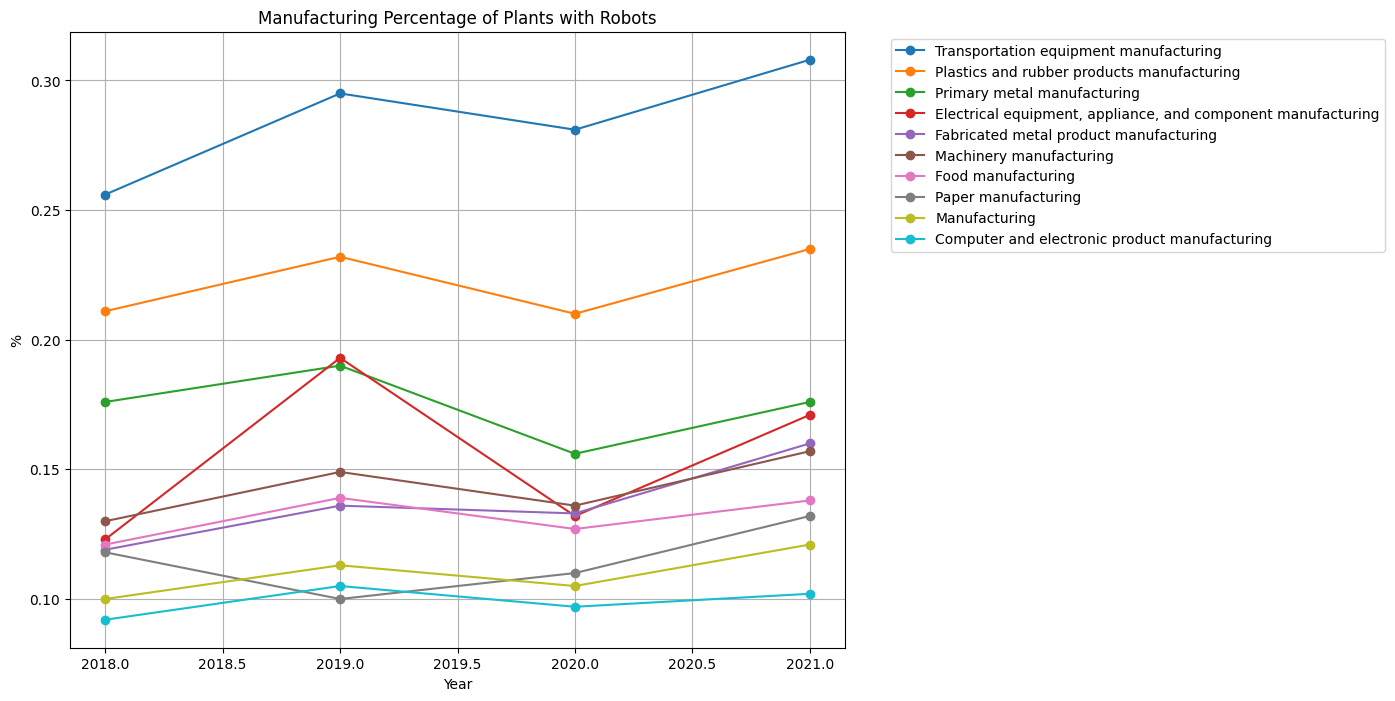

In [180]:
plants_with_robots = {
    
    'year': [2018, 2019, 2020, 2021],
    'Transportation equipment manufacturing': [0.256,0.295,0.281,0.308],
    'Plastics and rubber products manufacturing': [0.211,0.232,0.21,0.235],
    'Primary metal manufacturing': [0.176,0.19,0.156,0.176],
    'Electrical equipment, appliance, and component manufacturing': [0.123,0.193,0.132,0.171],
    'Fabricated metal product manufacturing': [0.119,0.136,0.133,0.16],
    'Machinery manufacturing':[0.13,0.149,0.136,0.157],
    'Food manufacturing':[0.121,0.139,0.127,0.138],
    'Paper manufacturing':[0.118,0.1,0.11,0.132],
    'Manufacturing':[0.1,0.113,0.105,0.121],
    'Computer and electronic product manufacturing':[0.092,0.105,0.097,0.102]
}







df = pd.DataFrame(plants_with_robots)

df.set_index('year', inplace=True)

# Plotting
plt.figure(figsize=(10, 8))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.title('Manufacturing Percentage of Plants with Robots')
plt.xlabel('Year')
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

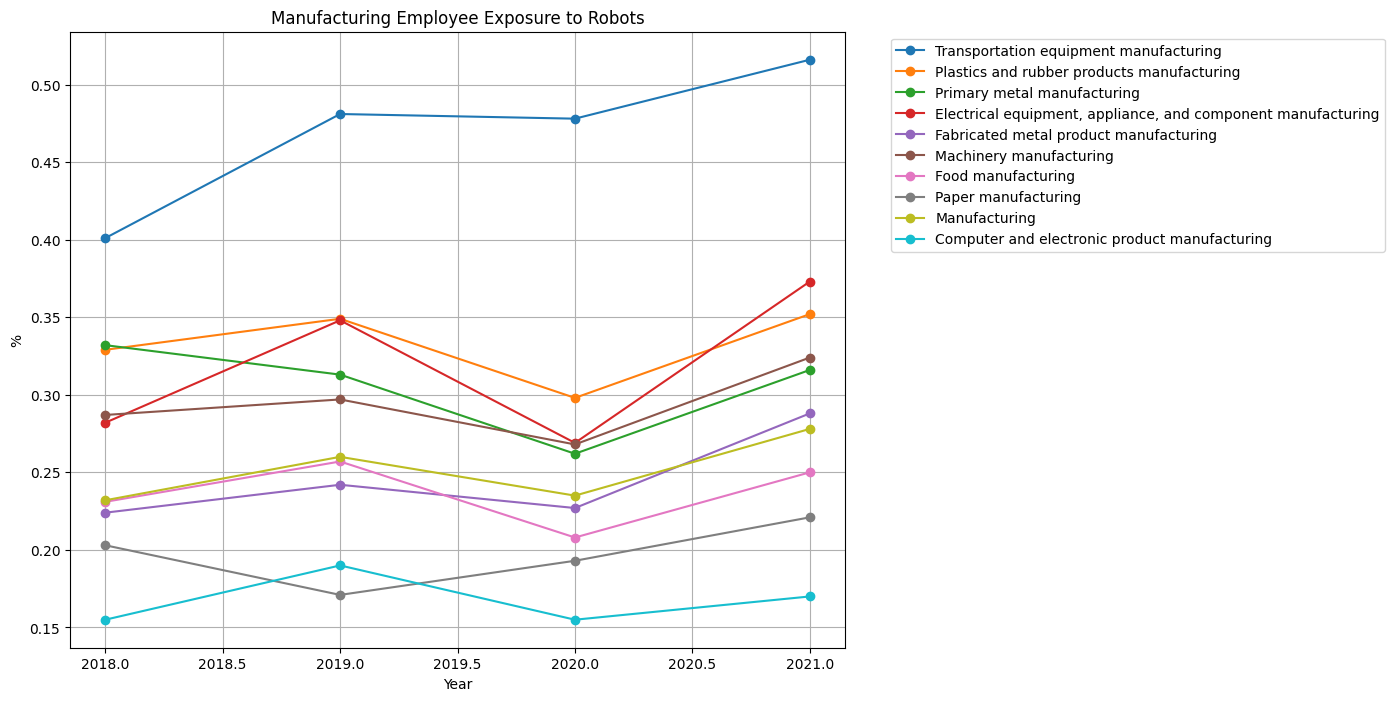

,Transportation equipment manufacturing,Plastics and rubber products manufacturing,Primary metal manufacturing,"Electrical equipment, appliance, and component manufacturing",Fabricated metal product manufacturing,Machinery manufacturing,Food manufacturing,Paper manufacturing,Manufacturing,Computer and electronic product manufacturing
year,,,,,,,,,,
2021,0.516,0.352,0.316,0.373,0.288,0.324,0.250,0.221,0.278,0.170
2020,0.478,0.298,0.262,0.269,0.227,0.268,0.208,0.193,0.235,0.155
2019,0.481,0.349,0.313,0.348,0.242,0.297,0.257,0.171,0.260,0.190
2018,0.401,0.329,0.332,0.282,0.224,0.287,0.231,0.203,0.232,0.155


In [181]:
exposure = {
    
    'year': [2021, 2020, 2019, 2018],
    'Transportation equipment manufacturing': [0.516,0.478,0.481,0.401],
    'Plastics and rubber products manufacturing': [0.352,0.298,0.349,0.329],
    'Primary metal manufacturing': [0.316,0.262,0.313,0.332],
    'Electrical equipment, appliance, and component manufacturing': [0.373,0.269,0.348,0.282],
    'Fabricated metal product manufacturing': [0.288,0.227,0.242,0.224],
    'Machinery manufacturing':[0.324,0.268,0.297,0.287],
    'Food manufacturing':[0.25,0.208,0.257,0.231],
    'Paper manufacturing':[0.221,0.193,0.171,0.203],
    'Manufacturing':[0.278,0.235,0.26,0.232],
    'Computer and electronic product manufacturing':[0.17,0.155,0.19,0.155]
}



df = pd.DataFrame(exposure)

df.set_index('year', inplace=True)

# Plotting
plt.figure(figsize=(10, 8))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.title('Manufacturing Employee Exposure to Robots')
plt.xlabel('Year')
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



df

In [183]:
adoptions = pd.read_excel('ASM Robotics.xlsx', sheet_name='Robot adopters vs not')

# Drop the first three rows
adoptions = adoptions.iloc[3:].reset_index(drop=True)

# Set the next row (now the first row) as the column names
adoptions.columns = adoptions.iloc[0]

# Drop the row that has been used to set column names
adoptions = adoptions.iloc[1:].reset_index(drop=True)


adoptions

,Plant Size \n(Number of employees),2021 Percent of Plants with Robots,2020 Percent of Plants with Robots,2019 Percent of Plants with Robots,2018 Percent of Plants with Robots,2021 Percent of Plants without Robots,2020 Percent of Plants without Robots,2019 Percent of Plants without Robots,2018 Percent of Plants without Robots
0,0-5,0.014,0.014,0.016,0.011,0.109,0.107,0.105,0.104
1,6-20,0.096,0.106,0.103,0.102,0.302,0.284,0.274,0.272
2,21-50,0.193,0.19,0.173,0.172,0.257,0.257,0.264,0.27
3,51-150,0.332,0.323,0.318,0.32,0.216,0.227,0.229,0.228
4,151-500,0.275,0.278,0.293,0.299,0.095,0.103,0.105,0.104
5,501-999,0.061,0.059,0.064,0.064,0.015,0.016,0.016,0.016
6,1000+,0.03,0.03,0.032,0.032,0.006,0.007,0.006,0.007
7,Total,1,1,1,1,1,1,1,1
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Data Management System (DMS) number: P-7500114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


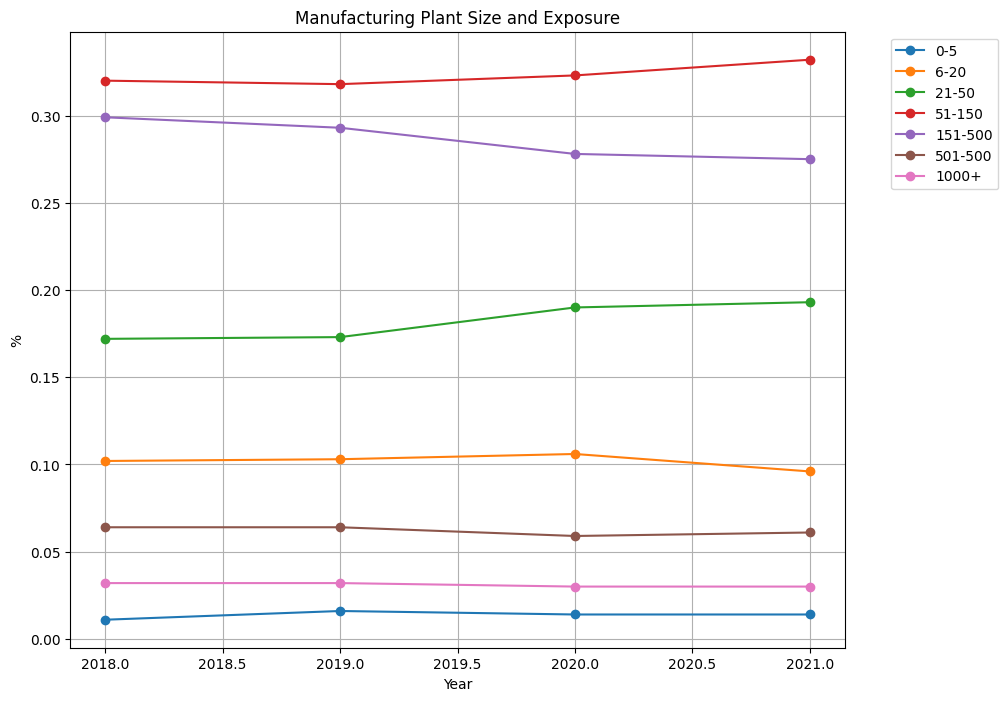

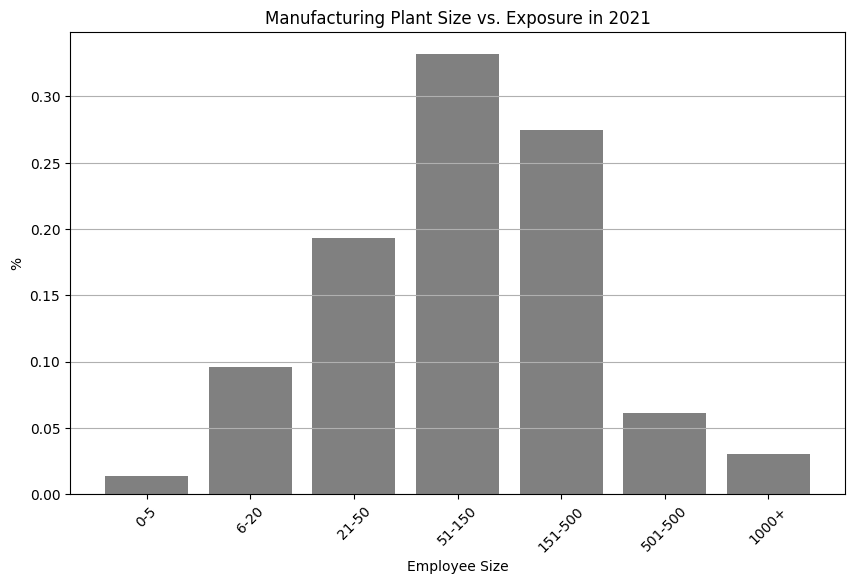

In [191]:
exposure = {
    
    'year': [2021, 2020, 2019, 2018],
    '0-5': [0.014,0.014,0.016,0.011],
    '6-20': [0.096,0.106,0.103,0.102],
    '21-50': [0.193,0.19,0.173,0.172],
    '51-150': [0.332,0.323,0.318,0.32],
    '151-500': [0.275,0.278,0.293,0.299],
    '501-500':[0.061,0.059,0.064,0.064],
    '1000+':[0.03,0.03,0.032,0.032],
}



df = pd.DataFrame(exposure)

df.set_index('year', inplace=True)

# Plotting
plt.figure(figsize=(10, 8))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.title('Manufacturing Plant Size and Exposure')
plt.xlabel('Year')
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Histogram for the year 2021
data_2021 = df.loc[2021]

plt.figure(figsize=(10, 6))
plt.bar(data_2021.index, data_2021.values, color='grey')

plt.title('Manufacturing Plant Size vs. Exposure in 2021')
plt.xlabel('Employee Size')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.grid(axis='y')


In [186]:
Capexs = pd.read_excel('ASM Robotics.xlsx', sheet_name='CapEx... NAICS')

# Drop the first three rows
Capexs = Capexs.iloc[3:].reset_index(drop=True)

# Set the next row (now the first row) as the column names
Capexs.Capexs = Capexs.iloc[0]

# Drop the row that has been used to set column names
Capexs= Capexs.iloc[1:].reset_index(drop=True)


Capexs

C:\Users\andre\AppData\Local\Temp\ipykernel_12240\1165941182.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Capexs.Capexs = Capexs.iloc[0]


,Capital Expenditures for Industrial Robotic Equipment by Industry,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,31-33,Manufacturing,3764000,3410000,3191000,2624000,1.9,1.7,1.2,1.1
1,311,Food manufacturing,296600,442600,326700,423600,2.8,3.2,2.9,2.2
2,312,Beverage and tobacco product manufacturing,100500,50180,19650,41810,7.2,11.3,12.4,4.8
3,313,Textile mills,"2,401(s)",3300,4274,3938,46.3,0.8,13.7,4.9
4,314,Textile product mills,4744,1904,D,981,14.7,28.9,D,3.5
5,315,Apparel manufacturing,D,999(s),D,98,D,74.1,D,0
6,316,Leather and allied products manufacturing,D,105,D,259,D,36.7,D,0
7,321,Wood product manufacturing,24670,43080,20780,5619,4.9,7.7,17.4,7.8
8,322,Paper manufacturing,77870,120800,75460,86720,5.2,2.6,3,10.5
9,323,Printing and related support activities,10430,6602,7827,7114,6.2,7.7,11.2,25.3


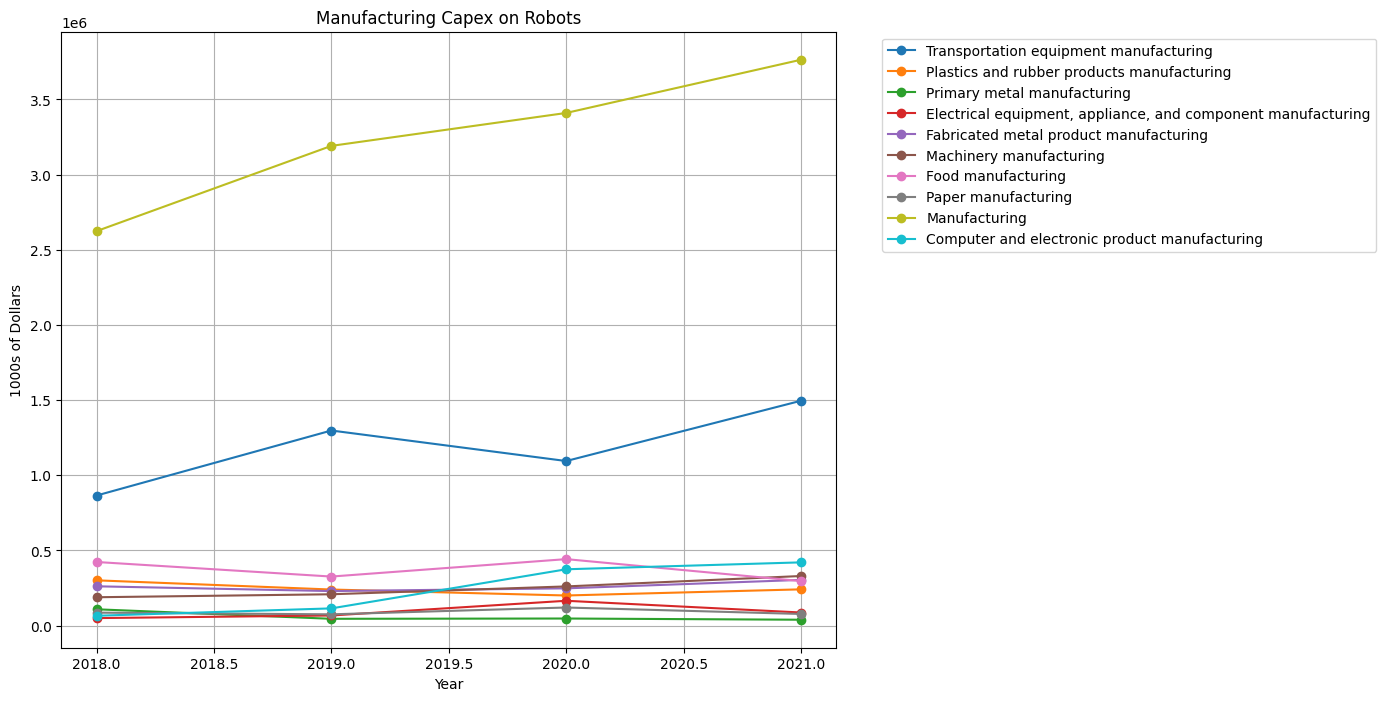

In [188]:
manu_capex = {
    
    'year': [2021, 2020, 2019, 2018],
    'Transportation equipment manufacturing': [1496000,1095000,1298000,865500],
    'Plastics and rubber products manufacturing': [241600,200800,240400,301600],
    'Primary metal manufacturing': [39610,47610,45750,109000],
    'Electrical equipment, appliance, and component manufacturing': [87580,165600,67820,50400],
    'Fabricated metal product manufacturing': [304500,248300,230100,261900],
    'Machinery manufacturing':[330300,261100,208900,189100],
    'Food manufacturing':[296600,442600,326700,423600],
    'Paper manufacturing':[77870,120800,75460,86720],
    'Manufacturing':[3764000,3410000,3191000,2624000],
    'Computer and electronic product manufacturing':[421100,375100,115000,65940]
}



df = pd.DataFrame(manu_capex)

df.set_index('year', inplace=True)

# Plotting
plt.figure(figsize=(10, 8))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.title('Manufacturing Capex on Robots')
plt.xlabel('Year')
plt.ylabel('1000s of Dollars')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
0,,,,,,,,,,,,,,,,,,,,,
2017 NAICS Code,31-33,311,312,313,314,315,316,321,322,323,...,334,335,336,337,339,NaN,Data Management System (DMS) number: P-7500114,Disclosure Review Board (DRB) approval number:...,Note: 2018 and 2019 are revised from previous ...,(s) - Standard error exceeds 40% of the estimate.
Meaning of NAICS Code,Manufacturing,Food manufacturing,Beverage and tobacco product manufacturing,Textile mills,Textile product mills,Apparel manufacturing,Leather and allied products manufacturing,Wood product manufacturing,Paper manufacturing,Printing and related support activities,...,Computer and electronic product manufacturing,"Electrical equipment, appliance, and component...",Transportation equipment manufacturing,Furniture and related product manufacturing,Miscellaneous manufacturing,NaN,NaN,NaN,NaN,NaN
2021 Percent of Plants with Robots,0.121,0.138,0.09,0.045,0.039,0.019,0.045,0.048,0.132,0.029,...,0.102,0.171,0.308,0.087,0.068,NaN,NaN,NaN,NaN,NaN
2020 Percent of Plants with Robots,0.105,0.127,0.063,0.045,0.025,0.022,0.063,0.043,0.11,0.024,...,0.097,0.132,0.281,0.075,0.064,NaN,NaN,NaN,NaN,NaN
2019 Percent of Plants with Robots,0.113,0.139,0.054,0.053,0.03,0.006,0.04,0.043,0.1,0.035,...,0.105,0.193,0.295,0.079,0.073,NaN,NaN,NaN,NaN,NaN
2018 Percent of Plants with Robots,0.1,0.121,0.087,0.055,0.032,0.006,0.015,0.03,0.118,0.028,...,0.092,0.123,0.256,0.069,0.064,NaN,NaN,NaN,NaN,NaN
2021 Percent of Employees Exposed to Robots,0.278,0.25,0.212,0.102,0.098,3.8%(s),0.209,0.104,0.221,8.0%(s),...,0.17,0.373,0.516,0.192,0.199,NaN,NaN,NaN,NaN,NaN
2020 Percent of Employees Exposed to Robots,0.235,0.208,0.139,0.094,0.077,3.6%(s),0.18,0.074,0.193,0.071,...,0.155,0.269,0.478,0.157,0.165,NaN,NaN,NaN,NaN,NaN
2019 Percent of Employees Exposed to Robots,0.26,0.257,0.124,0.096,0.08,0.012,0.154,0.066,0.171,0.095,...,0.19,0.348,0.481,0.196,0.195,NaN,NaN,NaN,NaN,NaN


In [120]:
years = ['2018', '2019', '2020', '2021']

# Plotting Percent of Plants with Robots
plt.figure(figsize=(10, 6))
for year in years:
    plt.plot(ASM['2017 NAICS Code'], ASM[f'{year} Percent of Plants with Robots'], label=f'{year}')

plt.title('Percent of Plants with Robots by NAICS Code')
plt.xlabel('2017 NAICS Code')
plt.ylabel('Percent of Plants with Robots')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Percent of Employees Exposed to Robots
plt.figure(figsize=(10, 6))
for year in years:
    plt.plot(ASM['2017 NAICS Code'], ASM[f'{year} Percent of Employees Exposed to Robots'], label=f'{year}')

plt.title('Percent of Employees Exposed to Robots by NAICS Code')
plt.xlabel('2017 NAICS Code')
plt.ylabel('Percent of Employees Exposed to Robots')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: '2017 NAICS Code'

<Figure size 1000x600 with 0 Axes>